In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Udit_LDA

Mounted at /content/drive
/content/drive/MyDrive/Udit_LDA


In [ ]:
import pickle

with open("kmer_frequencies.pickle", 'rb') as file:
    kmer_frequencies=pickle.load(file)


This is the alternate way suggested by Shruti Ma'am to extract lncRNA to increase number of lncRNA (failed at the end, from the previous way we are still getting more number of lncRNA with sequences)

In [ ]:
import pandas as pd

# Replace 'your_file.tsv' with the actual path to your TSV file
tsv_file_path = 'all_lncRNAs_names.tsv'

# Load the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

# Now you can work with the 'df' DataFrame containing the data from the TSV file
all_genes=list(df['Symbol'])
gene_types=list(df['Gene Type'])


In [ ]:
count=0
for i in gene_types:
  if i!="lncRNA":
    count+=1

print(count)

all_lncRNAs=[]
for i in range(len(gene_types)):
  if gene_types[i]=="lncRNA":
    all_lncRNAs.append(all_genes[i])

122


In [ ]:
data_frame = pd.read_excel('experimental lncRNA-disease information.xlsx')
dis = data_frame['Disease Name'].tolist()
lncname = data_frame['ncRNA Symbol'].tolist()

In [ ]:
import pickle

with open("lncRNA_names.pickle", 'rb') as file:
    lncRNA_names=pickle.load(file)

In [ ]:
len(lncRNA_names)

4458

In [ ]:
unq_lnc=list(set(lncname))
count=0
lncRNA_names=list(set(lncRNA_names))
print(len(unq_lnc))
for i in unq_lnc:
  for j in lncRNA_names:
    if i.lower()==j.lower():
      count+=1
      break

print(count)

19798
4526


In [ ]:
len(lncRNA_names)

4458

From the above method, we are getting 3581 lncRNAs previous method was giving 4458 lncRNAs. When I find the intersection between the two, 3264 lncRNAs were common. Hence, only 317 more lncRNAs we got.

In [ ]:
count=0
useful_lnc=[]
for i in unq_lnc:
  for j in all_lncRNAs:

    if(i.lower()==j.lower()):
      count+=1
      useful_lnc.append(i)
      break
print(count)

3581


In [ ]:
count=0
for i in useful_lnc:
  for j in lncRNA_names:

    if(i.lower()==j.lower()):
      count+=1
      break

In [ ]:
count

3264

In [ ]:
with open("sequences.pickle", 'rb') as file:
    sequences=pickle.load(file)

The below dictionary contains the lncRNAs which I was considering lncRNAs earlier as they were part of the lncRNA disease database.

In [ ]:
import pickle

with open("new_dic_for_non_lncRNA.pickle", 'rb') as file:
      new_dic=pickle.load(file)

len(new_dic)

93

In [ ]:
new_dic

{'HCG22': 'ncRNA_pseudogene',
 'TRBV11-2': 'V_segment',
 'MAP3K14': 'protein-coding',
 'CFL1P1': 'transcribed_pseudogene',
 'DHRS4L1': 'transcribed_pseudogene',
 'PCDHB18P': 'transcribed_pseudogene',
 'DLEU2L': 'ncRNA_pseudogene',
 'EMBP1': 'transcribed_pseudogene',
 'FMO9P': 'transcribed_pseudogene',
 'RNU6ATAC35P': 'transcribed_pseudogene',
 'PINK1-AS': 'antisense_RNA',
 'NBPF25P': 'transcribed_pseudogene',
 'RN7SL832P': 'transcribed_pseudogene',
 'ANKRD36BP2': 'transcribed_pseudogene',
 'FAM86JP': 'transcribed_pseudogene',
 'NMRAL2P': 'transcribed_pseudogene',
 'SCAANT1': 'antisense_RNA',
 'FAM86DP': 'transcribed_pseudogene',
 'TERC': 'telomerase_RNA',
 'SDHAP1': 'transcribed_pseudogene',
 'HTT-AS': 'antisense_RNA',
 'ZNF300P1': 'transcribed_pseudogene',
 'TRAF3IP2-AS1': 'antisense_RNA',
 'NANOGP11': 'pseudogene',
 'SERPINB9P1': 'transcribed_pseudogene',
 'RAET1K': 'transcribed_pseudogene',
 'LPAL2': 'transcribed_pseudogene',
 'RNF216P1': 'transcribed_pseudogene',
 'SBDSP1': 'transc

Remove the above non lncRNAs in the list, hence 4365 lncRNAs remaining now.

> Add blockquote



In [ ]:
lnc_not_found=list(new_dic.keys())

final_lnc=[]
new_seq={}
for i in sequences:
  if i not in lnc_not_found:
    final_lnc.append(i)
    new_seq[i]=sequences[i]

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store the counts of uppercase and lowercase nucleotides
uppercase_counts = []
lowercase_counts = []

# Iterate through the sequences in the dictionary
for seq_id, seq in new_seq.items():
    uppercase_count = 0
    lowercase_count = 0
    for nucleotide in seq:
        if nucleotide in ['A', 'T', 'G', 'C']:
            uppercase_count += 1
        elif nucleotide in ['a', 't', 'g', 'c']:
            lowercase_count += 1

    # Append the counts to the respective lists
    uppercase_counts.append(uppercase_count)
    lowercase_counts.append(lowercase_count)

# Plot the histogram
print(sum(uppercase_counts))
print(sum(lowercase_counts))


4335149
0


In [ ]:
import pickle
with open("new_sequence.pickle", 'wb') as file:
    pickle.dump(new_seq, file)

In [ ]:
len(new_seq)

4365

Same Feature Extraction on the basis of kmer, levenstein distance and lncRNA gene association for lncRNA and disease ontology similarity and disease gene similarity for diseases.

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
import itertools
k = 3
possible_kmers = [''.join(p) for p in itertools.product('ATCG', repeat=k)]

# Create a dictionary to store the k-mer frequencies for each lncRNA ID
kmer_frequencies = {}
lncRNAseq=new_seq
# Iterate over the lncRNA sequences
for lncRNA_id, sequence in lncRNAseq.items():
    # Initialize a dictionary to store the k-mer frequencies for the current sequence
    sequence_kmers = {kmer: 0 for kmer in possible_kmers}

    # Iterate over the sequence with a sliding window of size k
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        sequence_kmers[kmer] += 1

    # Store the k-mer frequencies for the current lncRNA ID
    kmer_frequencies[lncRNA_id] = sequence_kmers

similarity_matrix = np.zeros((len(lncRNAseq), len(lncRNAseq)))
for i, (lncRNA_id1, sequence_kmers1) in enumerate(kmer_frequencies.items()):
    for j, (lncRNA_id2, sequence_kmers2) in enumerate(kmer_frequencies.items()):
        distance = euclidean(list(sequence_kmers1.values()), list(sequence_kmers2.values()))
        similarity = 1 / (1 + distance)
        similarity_matrix[i, j] = similarity
print(similarity_matrix)

[[1.         0.0111118  0.03837309 ... 0.04166667 0.00845439 0.03189998]
 [0.0111118  1.         0.00955184 ... 0.01001925 0.0133034  0.01284191]
 [0.03837309 0.00955184 1.         ... 0.05317878 0.00746898 0.02687613]
 ...
 [0.04166667 0.01001925 0.05317878 ... 1.         0.00770864 0.02950395]
 [0.00845439 0.0133034  0.00746898 ... 0.00770864 1.         0.00946078]
 [0.03189998 0.01284191 0.02687613 ... 0.02950395 0.00946078 1.        ]]


In [ ]:
import pickle
with open("kmer_frequencies.pickle", 'wb') as file:
    pickle.dump(kmer_frequencies, file)

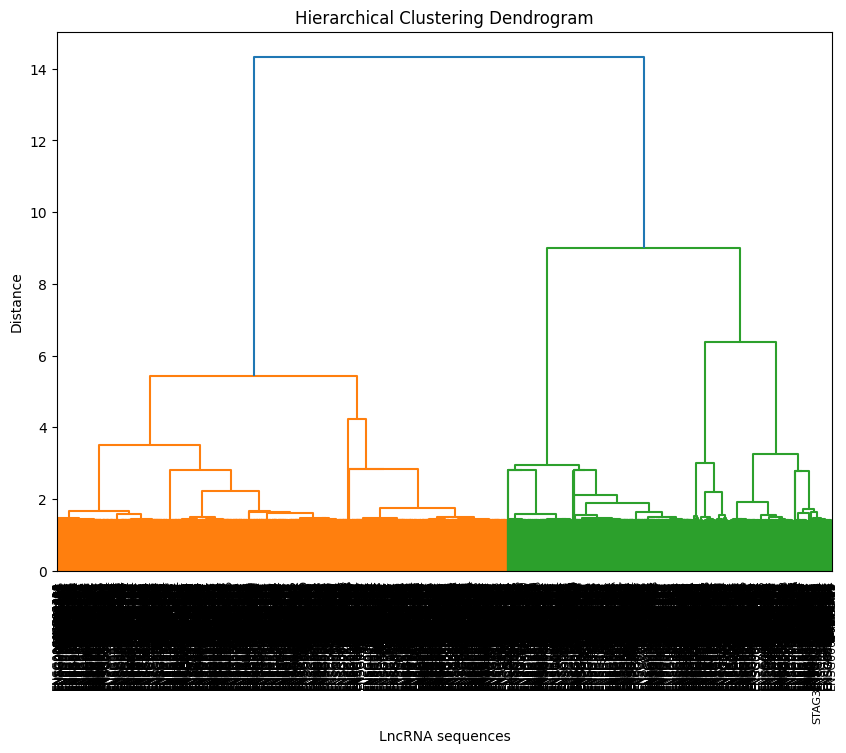

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
kmer_similarity_matrix = similarity_matrix
similarity_matrix_copy = np.copy(kmer_similarity_matrix)

# Set diagonal elements to 1 (since self-similarity is maximum)
np.fill_diagonal(similarity_matrix_copy, 1)

# Normalize the similarity matrix between 0 and 1
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

# Convert similarity matrix to distance matrix
distance_matrix = 1 - normalized_similarity_matrix

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram to visualize the clusters
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=final_lnc, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('LncRNA sequences')
plt.ylabel('Distance')
plt.show()


Cluster 4015: ['LINC01141', 'APPAT', 'CARMN', 'MLIP-AS1', 'PCDH9-AS2', 'FOXG1-AS1']
Cluster 4018: ['RTCA-AS1', 'SEC62-AS1', 'LINC02433', 'LINC01162', 'ENSG00000283341', 'LINC02441', 'ENSG00000227161', 'LINC01919', 'ENSG00000267827']
Cluster 4014: ['LINC02255', 'LINC02028', 'STX18-IT1', 'BVES-AS1', 'ENSG00000283352', 'LINC01591', 'LINC01490', 'LINC02342', 'ENSG00000261469', 'ENSG00000274949', 'ENSG00000228809', 'LINC00189']


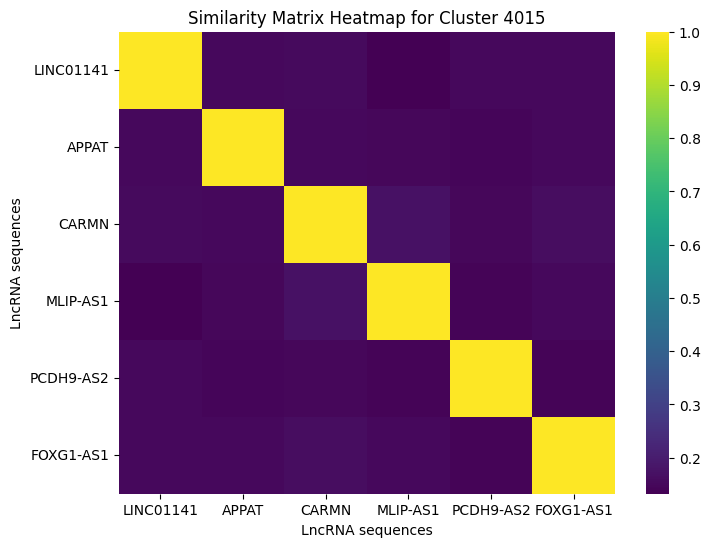

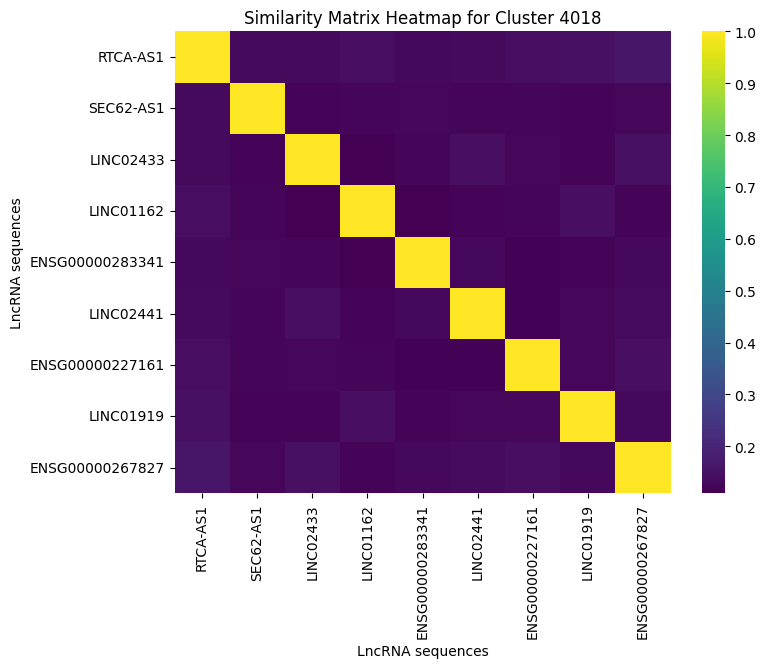

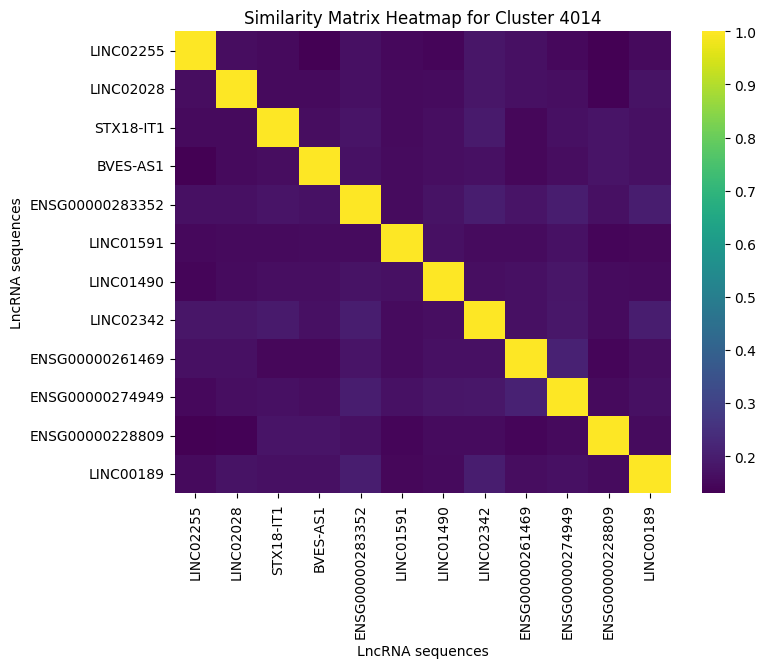

In [ ]:

# Cut the dendrogram to form clusters
max_d = 1.3  # Adjust this threshold to get the desired number of clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Extract the top 3 clusters
unique_clusters, counts = np.unique(clusters, return_counts=True)
top_3_clusters = unique_clusters[np.argsort(counts)[-3:]]

# Extract lncRNA names in the top 3 clusters
top_cluster_lncRNAs = {}
for cluster in top_3_clusters:
    lncRNAs_in_cluster = [final_lnc[i] for i in range(len(final_lnc)) if clusters[i] == cluster]
    top_cluster_lncRNAs[cluster] = lncRNAs_in_cluster

# Print the lncRNA names in the top 3 clusters
for cluster, lncRNAs in top_cluster_lncRNAs.items():
    print(f"Cluster {cluster}: {lncRNAs}")

# Visualize the similarity matrix for the top 3 clusters
for cluster, lncRNAs in top_cluster_lncRNAs.items():
    cluster_indices = [final_lnc.index(lncRNA) for lncRNA in lncRNAs]
    cluster_similarity_matrix = normalized_similarity_matrix[np.ix_(cluster_indices, cluster_indices)]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cluster_similarity_matrix, cmap='viridis', xticklabels=lncRNAs, yticklabels=lncRNAs)
    plt.title(f'Similarity Matrix Heatmap for Cluster {cluster}')
    plt.xlabel('LncRNA sequences')
    plt.ylabel('LncRNA sequences')
    plt.show()

Cluster 3637: ['LINC02403', 'LINC01876', 'PRICKLE2-AS2', 'PRKG1-AS1', 'AGBL1-AS1', 'PLAC4', 'LINC00106']
Cluster 3563: ['LINC01141', 'LINC02028', 'STX18-IT1', 'MLIP-AS1', 'PCDH9-AS2', 'FOXG1-AS1', 'ENSG00000261469', 'LINC00469', 'ENSG00000228809']
Cluster 3568: ['LINC02255', 'RTCA-AS1', 'CARMN', 'LINC02224', 'LINC01162', 'ENSG00000255448', 'ENSG00000258344', 'LINC01490', 'LINC00189', 'ENSG00000266560']


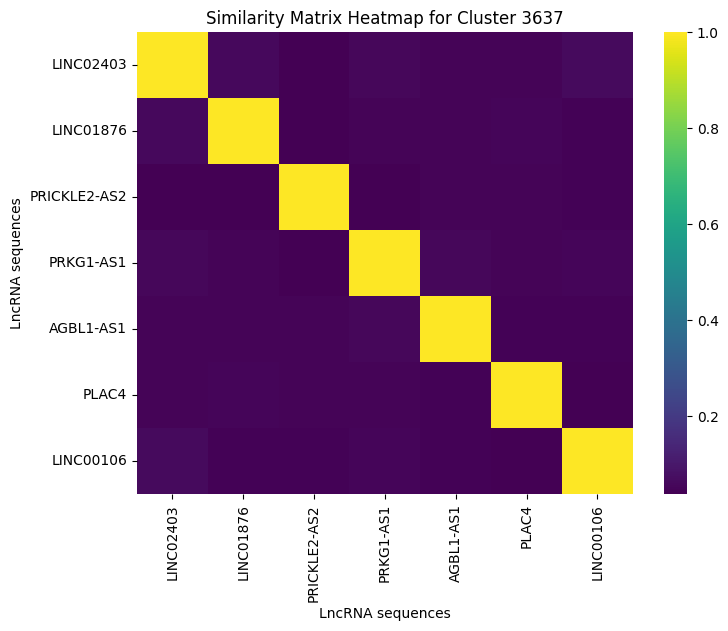

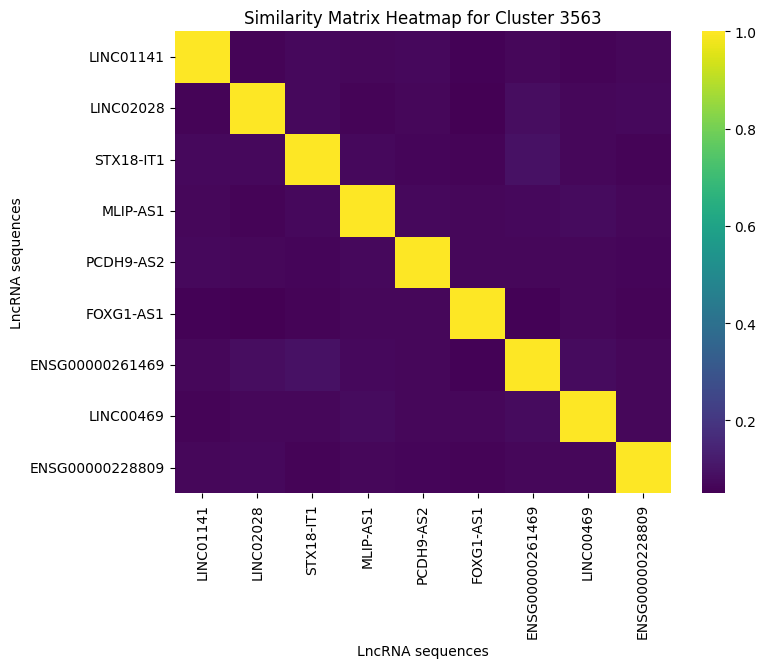

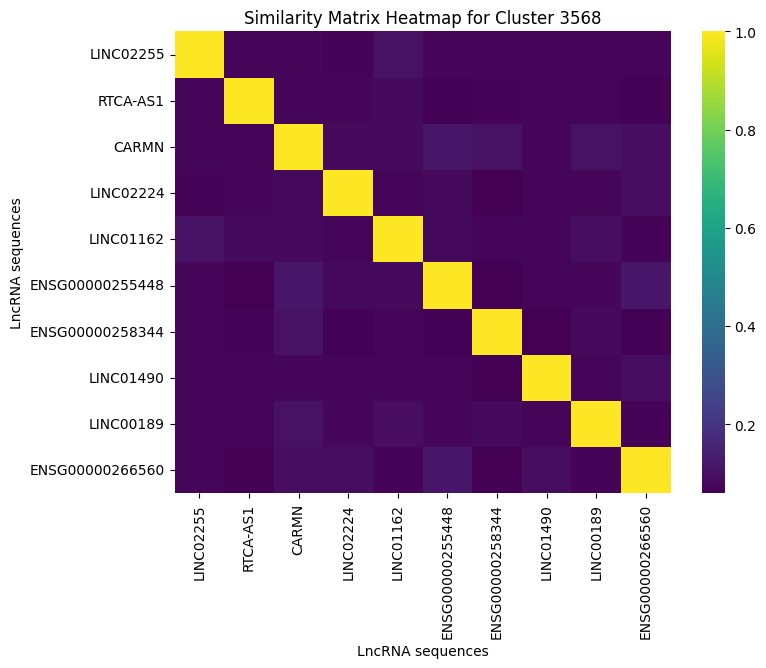

In [ ]:

# Cut the dendrogram to form clusters
max_d = 1.37  # Adjust this threshold to get the desired number of clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Extract the top 3 clusters
unique_clusters, counts = np.unique(clusters, return_counts=True)
top_3_clusters = unique_clusters[np.argsort(counts)[-3:]]

# Extract lncRNA names in the top 3 clusters
top_cluster_lncRNAs = {}
for cluster in top_3_clusters:
    lncRNAs_in_cluster = [final_lnc[i] for i in range(len(final_lnc)) if clusters[i] == cluster]
    top_cluster_lncRNAs[cluster] = lncRNAs_in_cluster

# Print the lncRNA names in the top 3 clusters
for cluster, lncRNAs in top_cluster_lncRNAs.items():
    print(f"Cluster {cluster}: {lncRNAs}")

# Visualize the similarity matrix for the top 3 clusters
for cluster, lncRNAs in top_cluster_lncRNAs.items():
    cluster_indices = [final_lnc.index(lncRNA) for lncRNA in lncRNAs]
    cluster_similarity_matrix = normalized_similarity_matrix[np.ix_(cluster_indices, cluster_indices)]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cluster_similarity_matrix, cmap='viridis', xticklabels=lncRNAs, yticklabels=lncRNAs)
    plt.title(f'Similarity Matrix Heatmap for Cluster {cluster}')
    plt.xlabel('LncRNA sequences')
    plt.ylabel('LncRNA sequences')
    plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Try different cluster numbers and find suitable clusters of size 20-40
best_clusters = None
for n_clusters in range(5, 50):  # Testing different cluster numbers
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="ward")

    cluster_labels = clustering.fit_predict(distance_matrix)

    # Count elements per cluster
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))

    # Select clusters with size 20-40
    selected_clusters = [c for c in cluster_sizes if 20 <= cluster_sizes[c] <= 40]

    if len(selected_clusters) >= 3:  # Ensure at least 3 valid clusters exist
        best_clusters = selected_clusters[:3]  # Pick top 3 clusters
        break

# Extract lncRNAs in selected clusters
lncRNA_clusters = {c: [] for c in best_clusters}
for i, label in enumerate(cluster_labels):
    if label in best_clusters:
        lncRNA_clusters[label].append(lncRNA_names[i])

# Plot similarity heatmaps for selected clusters
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, cluster in enumerate(best_clusters):
    cluster_indices = [lncRNA_names.tolist().index(name) for name in lncRNA_clusters[cluster]]
    cluster_matrix = similarity_matrix[np.ix_(cluster_indices, cluster_indices)]

    sns.heatmap(cluster_matrix, xticklabels=False, yticklabels=False, cmap="viridis", ax=axes[idx])
    axes[idx].set_title(f"Cluster {cluster} Heatmap")

plt.tight_layout()
plt.show()

# Return names of lncRNAs in the 3 clusters
lncRNA_clusters


TypeError: 'NoneType' object is not iterable

In [ ]:
from collections import defaultdict

# Group lncRNAs by cluster
clusters = defaultdict(list)
for lncRNA, label in valid_clustered_lncRNAs:
    clusters[label].append(lncRNA)

# Sort clusters by size and select the top 3
sorted_clusters = sorted(clusters.items(), key=lambda x: len(x[1]), reverse=True)[:3]

# Extract the top 3 clusters
top_clusters = {f"Cluster_{i + 1}": lncRNAs for i, (_, lncRNAs) in enumerate(sorted_clusters)}

# Print the size of each top cluster
for cluster_id, lncRNAs in top_clusters.items():
    print(f"{cluster_id}: {len(lncRNAs)} lncRNAs")

# Extract submatrices for each top cluster
cluster_matrices = {}
for cluster_id, lncRNAs in top_clusters.items():
    cluster_indices = np.where(np.isin(final_lnc, lncRNAs))[0]
    cluster_matrices[cluster_id] = similarity_matrix[cluster_indices][:, cluster_indices]

In [ ]:
# Store names of lncRNAs in the top 3 selected clusters
lncRNA_clusters = {}

for cluster, lncRNAs in selected_lncRNAs.items():
    lncRNA_clusters[f"Cluster {cluster}"] = lncRNAs  # Store the full list

# Print the lncRNA names in each of the best clusters
for cluster_name, lncRNAs  in lncRNA_clusters.items():
    print(f"\n{cluster_name} ({len(lncRNAs)} lncRNAs):\n", lncRNAs)


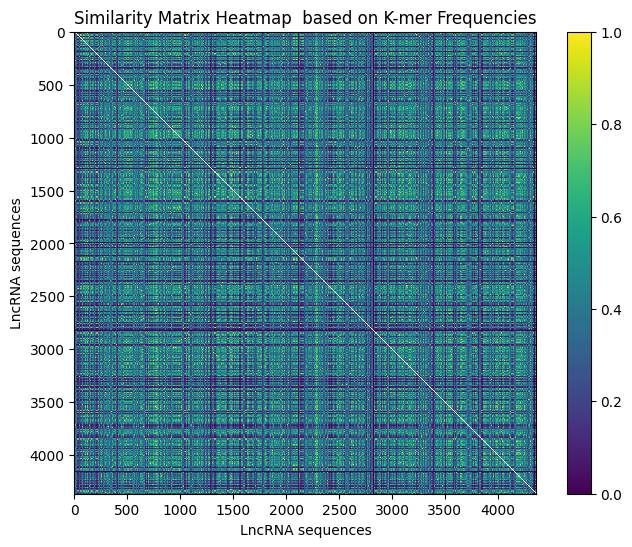

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
kmer_similarity_matrix=similarity_matrix
similarity_matrix_copy = np.copy(kmer_similarity_matrix)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Similarity Matrix Heatmap  based on K-mer Frequencies')
plt.xlabel('LncRNA sequences')
plt.ylabel('LncRNA sequences')
plt.show()


In [ ]:
import pickle
with open("kmer_similarity_matrix.pickle", 'wb') as file:
    pickle.dump(kmer_similarity_matrix, file)

In [ ]:
import numpy as np
!pip install Levenshtein

import Levenshtein
feature_matrix = np.zeros((len(lncRNAseq), len(lncRNAseq)))

for i, (lncRNA_id1, sequence1) in enumerate(lncRNAseq.items()):
    for j, (lncRNA_id2, sequence2) in enumerate(lncRNAseq.items()):
        # Calculate the Levenshtein distance between the sequences
        distance = Levenshtein.distance(sequence1, sequence2)
        similarity = 1 / (1 + distance)
        # Store the distance in the feature matrix
        feature_matrix[i, j] = similarity
        # disfeature_matrix[i, j] = distance

# Print the feature matrix
print(feature_matrix)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.9 MB/s eta 0:00:00
[[1.         0.00166667 0.00704225 ... 0.00775194 0.00126582 0.00591716]
 [0.00166667 1.         0.00136799 ... 0.00142045 0.00193424 0.00189753]
 [0.00704225 0.00136799 1.         ... 0.01612903 0.00108225 0.00425532]
 ...
 [0.00775194 0.00142045 0.01612903 ... 1.         0.00111483 0.00471698]
 [0.00126582 0.00193424 0.00108225 ... 0.00111483 1.         0.0014245 ]
 [0.00591716 0.00189753 0.00425532 ... 0.00471698 0.0014245  1.        ]]


In [ ]:
similarity_matrix = feature_matrix

In [ ]:
import pickle
with open("levdis_feature_matrix.pickle", 'wb') as file:
    pickle.dump(feature_matrix, file)

In [ ]:
levdis_feature_matrix=feature_matrix

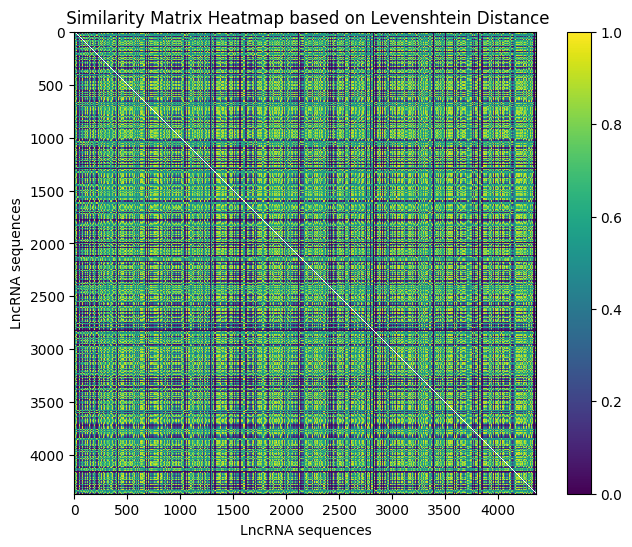

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(feature_matrix)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on Levenshtein Distance')
plt.xlabel('LncRNA sequences')
plt.ylabel('LncRNA sequences')
plt.show()


In [ ]:
import pandas as pd

lncRNAdic=new_seq
# Use the retrieved dictionary
names=[]
# names=lncRNAdic.keys()
for i in lncRNAdic.keys():
  names.append(i)

# # Read the Excel file
data_frame = pd.read_excel('experimental lncRNA-disease information.xlsx')
dis = data_frame['Disease Name'].tolist()
lncname = data_frame['ncRNA Symbol'].tolist()
nid= data_frame['NONCODE'].tolist()
name=[]

print(len(lncname))
print(len(names))

name=list(set(names))
print(len(name))

data_frame = pd.read_excel('output.xlsx')
lncRNAs = data_frame['ncName'].tolist()
genes = data_frame['tarID'].tolist()
genes_name = data_frame['tarName'].tolist()
gene_type=data_frame['tarType']
useful_gene_type=[]
print(len(lncRNAs))
# # print(lncRNAs)
useful_lncRNAs=[]
useful_genes=[]
genes1=[]
for i in range(len(lncRNAs)):
    if lncRNAs[i] in name:
        useful_lncRNAs.append(lncRNAs[i])
        useful_genes.append(genes[i])
        useful_gene_type.append(gene_type[i])
        genes1.append(genes_name[i])


print(len(useful_genes))

lncRNA_unique = list(set(useful_lncRNAs))
genes_unique = list(set(useful_genes))
print(len(lncRNA_unique))
print(len(genes_unique))


208275
4365
4365
658171
44963
1372
4827


In [ ]:


# # Create an empty matrix
import numpy as np
matrix = np.zeros((len(name), len(genes_unique)), dtype=int)


for i in range(len(useful_lncRNAs)):
    if useful_genes[i]!='-':
      lnc_idx=name.index(useful_lncRNAs[i])
      gene_idx=genes_unique.index(useful_genes[i])
      matrix[lnc_idx,gene_idx]=1



import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def create_similarity_matrix(association_matrix):
    # Calculate cosine similarity between lncRNAs
    similarity_matrix = cosine_similarity(association_matrix)


    return similarity_matrix

f3 = create_similarity_matrix(matrix)

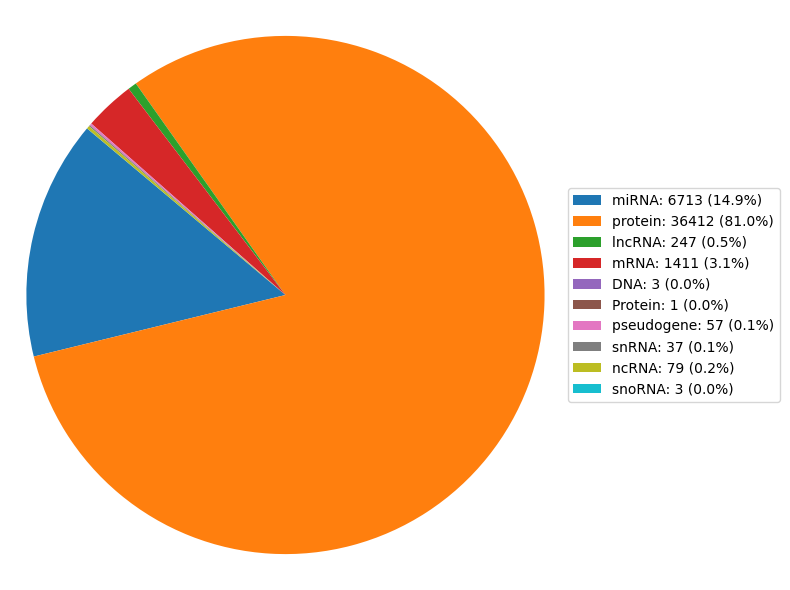

In [ ]:

import matplotlib.pyplot as plt
from collections import Counter

data = useful_gene_type

# Count occurrences of each unique label
label_counts = Counter(data)
labels = list(label_counts.keys())
sizes = list(label_counts.values())

# Create pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(sizes,  startangle=140, autopct=' ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot colored boxes with label names and percentages sideways
colors = [patch.get_facecolor() for patch in patches]
legend_labels = [f'{label}: {sizes[i]} ({sizes[i] / len(data) * 100:.1f}%)' for i, label in enumerate(labels)]

plt.legend(handles=patches, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

In [ ]:
with open("lnc_target_matrix.pickle", 'wb') as file:
    pickle.dump(matrix, file)

with open("lnc_target_similarity_matrix.pickle", 'wb') as file:
    pickle.dump(f3, file)

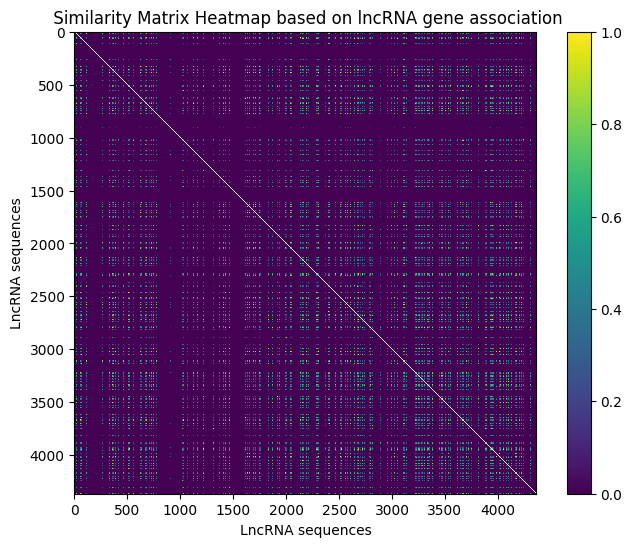

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(f3)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on lncRNA gene association')
plt.xlabel('LncRNA sequences')
plt.ylabel('LncRNA sequences')
plt.show()


In [ ]:
import pandas as pd


# # # Read the Excel file
data_frame = pd.read_excel('experimental lncRNA-disease information.xlsx')
# name=[]
dis = data_frame['Disease Name'].tolist()
lnc = data_frame['ncRNA Symbol'].tolist()
final_dis=[]
for l in range(len(lnc)):
  if lnc[l] in final_lnc and lnc[l]!=float and dis[l]!=float:
    final_dis.append(dis[l])

In [ ]:
disease_names=list(set(final_dis))

disease_names = [x.lower() for x in disease_names if type(x)!=float]
disease_names=list(set(disease_names))
print(len(disease_names))


469


In [ ]:
lncRNA_names=final_lnc
print(len(list(set(lncRNA_names))))

import requests
import pickle


base_url = "https://www.ebi.ac.uk/ols/api"

# disease_names = ["colorectal cancer", "diabetes", "hypertension"]  # Replace with your list of disease names
not_found=[]
count=0
doids=[]
doid_dic={}
new_dis=[]
for disease_name in disease_names:
    search_url = f"{base_url}/search?q={disease_name}&ontology=doid"

    response = requests.get(search_url)
    data = response.json()
    count+=1
    if count%100==0:
      print(count)
    if 'response' in data and 'docs' in data['response']:
        docs = data['response']['docs']
        try:
            if docs:
                doid = docs[0]['obo_id']
                term_label = docs[0]['label']
                doids.append(doid)
                new_dis.append(disease_name)
                doid_dic[disease_name]=doid
                # print(f"Disease Name: {disease_name}")
                # print(f"DOID: {doid}")
                # print(f"Term Label: {term_label}")
            else:
                # print(f"No results found for: {disease_name}")
                not_found.append(disease_name)
        except:
                not_found.append(disease_name)

    else:
        print(f"Error retrieving data for: {disease_name}")


print(len(disease_names))
print(len(not_found))
print(doids)

4365
100
200
300
400
469
2
['DOID:0050425', 'DOID:0040085', 'DOID:6271', 'DOID:0080144', 'DOID:8778', 'DOID:3908', 'DOID:11132', 'DOID:3575', 'DOID:0050830', 'DOID:3070', 'DOID:2729', 'DOID:1184', 'DOID:0080685', 'DOID:0111511', 'DOID:0040085', 'DOID:13378', 'DOID:824', 'DOID:4226', 'DOID:0050861', 'DOID:5485', 'DOID:6432', 'DOID:4914', 'DOID:0040085', 'DOID:0112313', 'DOID:0050589', 'DOID:0081292', 'DOID:4074', 'DOID:8986', 'DOID:8552', 'DOID:0050908', 'DOID:9182', 'DOID:8469', 'DOID:1319', 'DOID:305', 'DOID:2835', 'DOID:1414', 'DOID:1686', 'DOID:9296', 'DOID:0080848', 'DOID:2998', 'DOID:403', 'DOID:12930', 'DOID:1936', 'DOID:2600', 'DOID:9972', 'DOID:2154', 'DOID:6713', 'DOID:1749', 'DOID:13241', 'DOID:0050700', 'DOID:13574', 'DOID:9072', 'DOID:1932', 'DOID:5746', 'DOID:399', 'DOID:2055', 'DOID:14330', 'DOID:594', 'DOID:0050848', 'DOID:13865', 'DOID:8893', 'DOID:114', 'DOID:0050827', 'DOID:1470', 'SYMP:0000022', 'DOID:0080630', 'DOID:8649', 'DOID:3571', 'DOID:6315', 'DOID:0080603', '

In [ ]:
doids=list(doid_dic.values())
disease_names=list(doid_dic.keys())

with open("doids.pickle", 'wb') as file:
    pickle.dump(doids, file)

with open("doid_dic.pickle", 'wb') as file:
    pickle.dump(doid_dic, file)


In [ ]:
import pandas as pd

# Replace 'your_file.tsv' with the actual path to your TSV file
tsv_file_path = 'human_disease_textmining_filtered.tsv'

# Load the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

# Now you can work with the 'df' DataFrame containing the data from the TSV file
diseases=list(df.iloc[:,3])

In [ ]:
genes=list(df.iloc[:,1])
print(len(set(genes)))

20415


In [ ]:

import pandas as pd

# Replace 'your_file.tsv' with the actual path to your TSV file
tsv_file_path = 'human_disease_textmining_filtered.tsv'

# Load the TSV file into a Pandas DataFrame
df = pd.read_csv(tsv_file_path, sep='\t')

# Now you can work with the 'df' DataFrame containing the data from the TSV file
diseases=list(df.iloc[:,3])
genes=list(df.iloc[:,1])
doid=list(df.iloc[:,2])
dis=disease_names
d=[]
count=0
c=0
gdi_new={}
for i in dis:
    x=i.split(" ")

    for j in range(len(diseases)):
        c=0
        for k in x:
            if k in diseases[j]:
                c+=1
        if c==len(diseases[j]) or c>=2:
            if i not in gdi_new:
                d.append(doid[j])
                gdi_new[i]=[genes[j]]
            else:
                gdi_new[i].append(genes[j])
    # if i in dis:
    #     count+=1
print(len(dis))
print(len(gdi_new))
# print(gdi_new)
print(len(d))
print(d)


467
140
140
['DOID:0050425', 'DOID:0080638', 'DOID:3393', 'DOID:0070017', 'DOID:0111511', 'DOID:635', 'DOID:4226', 'DOID:9192', 'DOID:0090125', 'DOID:0070323', 'DOID:0111249', 'DOID:0110461', 'DOID:4471', 'DOID:5746', 'DOID:2055', 'DOID:1682', 'DOID:0080638', 'DOID:0040092', 'DOID:4471', 'DOID:5426', 'DOID:4471', 'DOID:8618', 'DOID:3393', 'DOID:11934', 'DOID:13208', 'DOID:0060041', 'DOID:0110861', 'DOID:10823', 'DOID:0080374', 'DOID:5683', 'DOID:4471', 'DOID:0050958', 'DOID:4877', 'DOID:11054', 'DOID:4471', 'DOID:9253', 'DOID:3500', 'DOID:11432', 'DOID:6255', 'DOID:4439', 'DOID:4471', 'DOID:4006', 'DOID:9352', 'DOID:4471', 'DOID:11612', 'DOID:7596', 'DOID:1089', 'DOID:0080938', 'DOID:0050872', 'DOID:1040', 'DOID:9352', 'DOID:4471', 'DOID:0080649', 'DOID:9352', 'DOID:0080208', 'DOID:3590', 'DOID:0090020', 'DOID:6255', 'DOID:0080827', 'DOID:0112247', 'DOID:0050958', 'DOID:13276', 'DOID:0060878', 'DOID:5773', 'DOID:4471', 'DOID:5683', 'DOID:9408', 'DOID:14004', 'DOID:9352', 'DOID:9408', '

In [ ]:
# with open("adjacencyList_of_Diseases&Genes.pickle", "rb") as file:
#     adj = pickle.load(file)

import numpy as np
adj=gdi_new
genes = set()
for gene_list in adj.values():
    genes.update(gene_list)
genes = sorted(list(genes))

print(len(genes))
# Create an empty adjacency matrix filled with zeros
num_diseases = len(disease_names)
num_genes = len(genes)
gdi = np.zeros(((num_diseases), (num_genes)), dtype=int)


# Fill in the adjacency matrix based on the disease gene associations
# for i, (disease, gene_list) in enumerate(adj.items()):
#     for gene in gene_list:
#         j = genes.index(gene)
#         gdi[i][j] = 1

for d in range(len(disease_names)):
  if disease_names[d] in adj:
    for i,g in enumerate(genes):
      if g in adj[disease_names[d]]:
        gdi[d][i]=1


10432


In [ ]:
genes1=list(set(genes1))
genes2=genes
count=0
for i in genes1:
    if i in genes2:
      count+=1

print(count)


2089


In [ ]:
len(genes2)

10432

In [ ]:
total_genes=list(set(genes1+genes2))
len(total_genes)

13335

In [ ]:
import pickle

with open("total_genes_names.pickle", 'wb') as file:
    pickle.dump(total_genes, file)

with open("lncRNA_genes_names.pickle", 'wb') as file:
    pickle.dump(genes1, file)

with open("disease_genes_names.pickle", 'wb') as file:
    pickle.dump(genes2, file)

In [ ]:
len(genes2)

10432

In [ ]:
num_diseases = len(disease_names)
num_genes = len(total_genes)
matrix2 = np.zeros(((num_diseases), (num_genes)), dtype=int)


# Fill in the adjacency matrix based on the disease gene associations
# for i, (disease, gene_list) in enumerate(adj.items()):
#     for gene in gene_list:
#         j = genes.index(gene)
#         gdi[i][j] = 1

for d in range(len(disease_names)):
  if disease_names[d] in adj:
    for i,g in enumerate(total_genes):
      if g in adj[disease_names[d]]:
        matrix2[d][i]=1

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def create_similarity_matrix(association_matrix):
    # Calculate cosine similarity between lncRNAs2759502
    similarity_matrix = cosine_similarity(association_matrix)
    return similarity_matrix
gdi_num=create_similarity_matrix(gdi)

In [ ]:
gdi_num.shape

(467, 467)

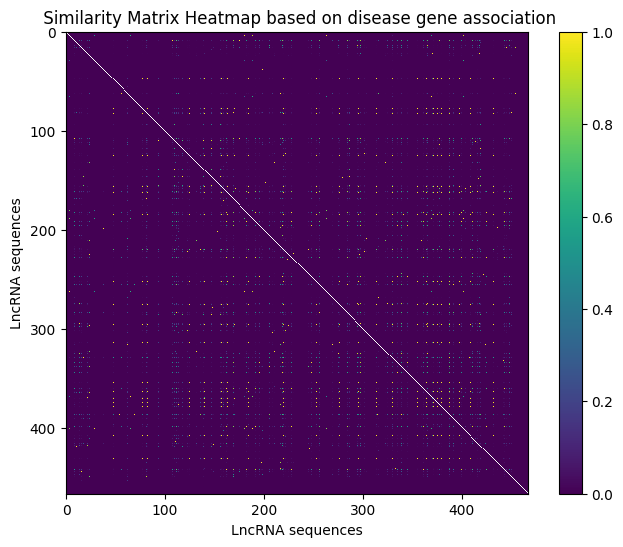

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(gdi_num)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on disease gene association')
plt.xlabel('LncRNA sequences')
plt.ylabel('LncRNA sequences')
plt.show()


In [ ]:
import pandas as pd
ddsim=pd.read_csv("ddsim_target.csv")
dss = ddsim.values
print(dss.shape)

(467, 467)


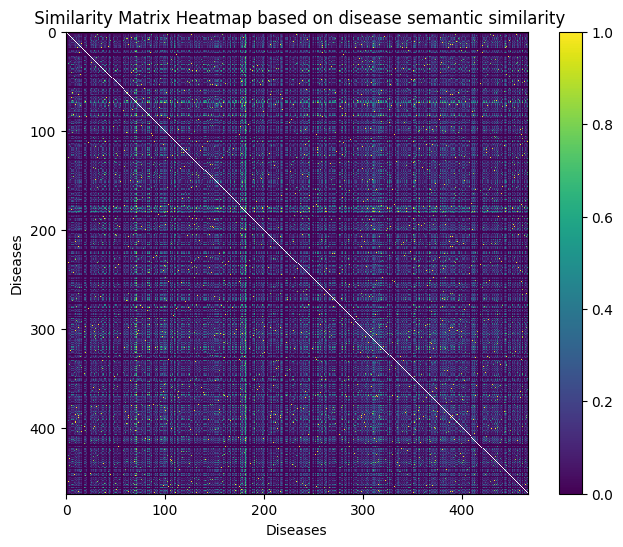

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(dss)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on disease semantic similarity')
plt.xlabel('Diseases')
plt.ylabel('Diseases')
plt.show()


In [ ]:
import pandas as pd


# # # Read the Excel file
data_frame = pd.read_excel('experimental lncRNA-disease information.xlsx')
# name=[]
dis = data_frame['Disease Name'].tolist()
lnc = data_frame['ncRNA Symbol'].tolist()
count=0
lda = np.zeros((len(lncRNA_names), len(disease_names)), dtype=int)
disease_names_lower = [x.lower() for x in disease_names]

for i in range(len(lnc)):
  if (lnc[i] in lncRNA_names) and type(dis[i])!=float and (dis[i].lower() in disease_names_lower):
    lnc_idx=lncRNA_names.index(lnc[i])
    dis_idx=disease_names_lower.index(dis[i].lower())
    count+=1
    lda[lnc_idx,dis_idx]=1


print(count)

6285


In [ ]:
lda.shape

(4365, 467)

In [ ]:
count=0
for i in lda:
  for j in i:
    if j==1:
      count+=1

print(count)

4579


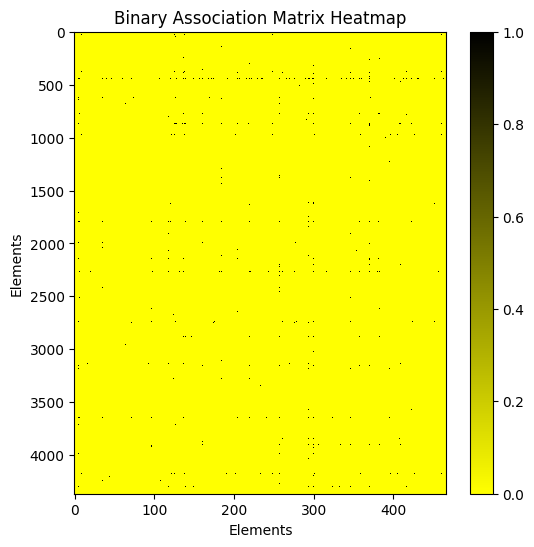

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Example binary association matrix
binary_matrix = lda

# Create a custom colormap where 1's are black and 0's are yellow
colors = [(1, 1, 0), (0, 0, 0)]  # Yellow (1's) and Black (0's)
cmap_name = 'custom_colormap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# Plotting the heatmap using the custom colormap
plt.figure(figsize=(6, 6))
plt.title('Binary Association Matrix Heatmap')
plt.imshow(binary_matrix, cmap=custom_cmap, interpolation='nearest', aspect='auto')
plt.xlabel('Elements')
plt.ylabel('Elements')
plt.colorbar()
plt.show()


In [ ]:
import numpy as np

def gKernel(nl, nd, inter_lncdis):
    # Compute Gaussian interaction profile kernel of lncRNAs
    sl = np.zeros(nl)
    for i in range(nl):
        sl[i] = np.linalg.norm(inter_lncdis[i, :]) ** 2
    gamal = nl / np.sum(sl) * 1
    pkl = np.zeros((nl, nl))
    for i in range(nl):
        for j in range(nl):
            pkl[i, j] = float(np.exp(-gamal * (np.linalg.norm(inter_lncdis[i, :] - inter_lncdis[j, :])) ** 2))

    # Compute Gaussian interaction profile kernel of diseases
    sd = np.zeros(nd)
    for i in range(nd):
        sd[i] = np.linalg.norm(inter_lncdis[:, i]) ** 2
    gamad = nd / np.sum(sd) * 1
    pkd = np.zeros((nd, nd))
    for i in range(nd):
        for j in range(nd):
            pkd[i, j] = float(np.exp(-gamad * (np.linalg.norm(inter_lncdis[:, i] - inter_lncdis[:, j])) ** 2))

    result_lnc = pkl
    result_dis = pkd

    return result_lnc, result_dis


gip_lnc,gip_dis=gKernel(len(lncRNA_names), len(disease_names), lda)


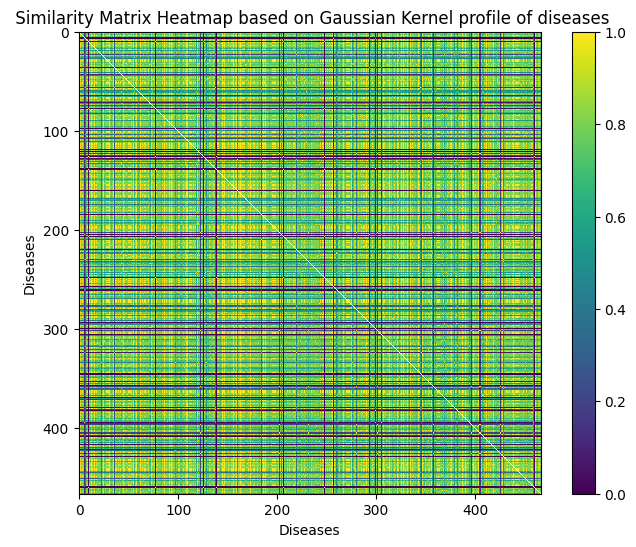

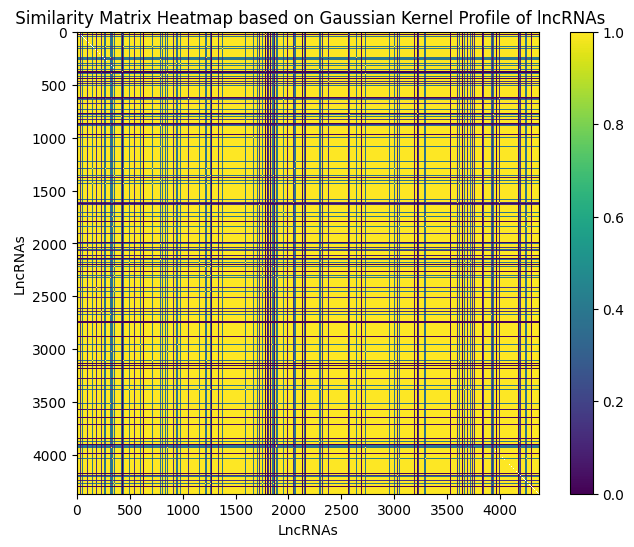

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(gip_dis)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on Gaussian Kernel profile of diseases')
plt.xlabel('Diseases')
plt.ylabel('Diseases')
plt.show()



import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(gip_lnc)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on Gaussian Kernel Profile of lncRNAs')
plt.xlabel('LncRNAs')
plt.ylabel('LncRNAs')
plt.show()


In [ ]:
import numpy as np
lncRNA_feature=np.hstack((kmer_similarity_matrix,levdis_feature_matrix,f3))
disease_feature=np.hstack((gdi_num,dss))

print(lncRNA_feature.shape)
print(disease_feature.shape)

(4365, 13095)
(467, 934)


In [ ]:

with open('lncRNA_feature.pickle', 'wb') as file:
    pickle.dump(lncRNA_feature, file)

with open('disease_feature.pickle', 'wb') as file:
    pickle.dump(disease_feature, file)

with open('gip_lnc.pickle', 'wb') as file:
    pickle.dump(gip_lnc, file)

with open('gip_dis.pickle', 'wb') as file:
    pickle.dump(gip_dis, file)


In [ ]:
import pandas as pd

lncRNAdic=new_seq
# Use the retrieved dictionary
names=[]
# names=lncRNAdic.keys()
for i in lncRNAdic.keys():
  names.append(i)

# # Read the Excel file
data_frame = pd.read_excel('experimental lncRNA-disease information.xlsx')
dis = data_frame['Disease Name'].tolist()
lncname = data_frame['ncRNA Symbol'].tolist()
nid= data_frame['NONCODE'].tolist()
name=[]

print(len(lncname))
print(len(names))

name=list(set(names))
print(len(name))

data_frame = pd.read_excel('output.xlsx')
lncRNAs = data_frame['ncName'].tolist()
genes = data_frame['tarID'].tolist()
genes_name = data_frame['tarName'].tolist()
gene_type=data_frame['tarType']
useful_gene_type=[]
print(len(lncRNAs))
# # print(lncRNAs)
useful_lncRNAs=[]
useful_genes=[]
genes1=[]
for i in range(len(lncRNAs)):
    if lncRNAs[i] in name:
        useful_lncRNAs.append(lncRNAs[i])
        useful_genes.append(genes[i])
        useful_gene_type.append(gene_type[i])
        genes1.append(genes_name[i])


print(len(useful_genes))



lncRNA_unique = list(set(useful_lncRNAs))
genes_unique = list(set(total_genes))
print(len(lncRNA_unique))
print(len(genes_unique))

# # Create an empty matrix
import numpy as np
matrix1 = np.zeros((len(name), len(total_genes)), dtype=int)


for i in range(len(useful_lncRNAs)):
    if genes1[i]!='-':
      lnc_idx=name.index(useful_lncRNAs[i])
      gene_idx=total_genes.index(genes1[i])
      matrix1[lnc_idx,gene_idx]=1


208275
4365
4365
658171
44963
1372
4827
1372
13335


In [ ]:
matrix.shape

(4365, 4827)

In [ ]:
num_diseases = len(disease_names)
num_genes = len(total_genes)
matrix2 = np.zeros(((num_diseases), (num_genes)), dtype=int)


# Fill in the adjacency matrix based on the disease gene associations
# for i, (disease, gene_list) in enumerate(adj.items()):
#     for gene in gene_list:
#         j = genes.index(gene)
#         gdi[i][j] = 1

for d in range(len(disease_names)):
  if disease_names[d] in adj:
    for i,g in enumerate(total_genes):
      if g in adj[disease_names[d]]:
        matrix2[d][i]=1

In [ ]:
genes_matrix=np.vstack((matrix1,matrix2)).T
genes_matrix.shape

(13335, 4832)

In [ ]:
import pickle
with open("genes_matrix.pickle", 'wb') as file:
    pickle.dump(genes_matrix, file)

In [ ]:
import pickle

with open("genes_matrix.pickle", 'rb') as file:
    genes_matrix=pickle.load(file)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
genes_func_sim = cosine_similarity(genes_matrix)

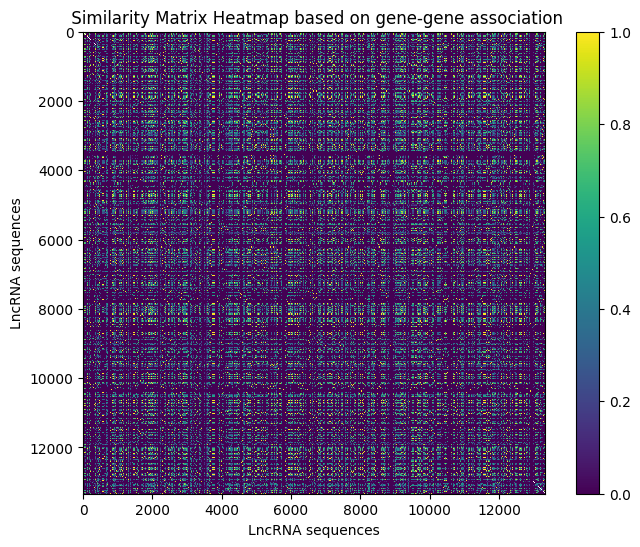

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming similarity_matrix contains your 4458x4458 similarity matrix
# Create a copy of the similarity matrix
similarity_matrix_copy = np.copy(genes_func_sim)

# Set diagonal elements to NaN
np.fill_diagonal(similarity_matrix_copy, np.nan)

# Normalize the similarity matrix between 0 and 1, ignoring NaN values
scaler = MinMaxScaler()
normalized_similarity_matrix = scaler.fit_transform(similarity_matrix_copy)

plt.figure(figsize=(8, 6))
plt.imshow(normalized_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title(' Similarity Matrix Heatmap based on gene-gene association')
plt.xlabel('LncRNA sequences')
plt.ylabel('LncRNA sequences')
plt.show()


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def gaussian_kernel_similarity_matrix(matrix, sigma):
    """
    Compute the Gaussian (RBF) kernel similarity matrix for a given matrix.

    Args:
    matrix (np.ndarray): A 2D numpy array of shape (n, m).
    sigma (float): The width parameter for the Gaussian kernel.

    Returns:
    np.ndarray: A 2D numpy array of shape (n, n) representing the Gaussian kernel similarity matrix.
    """
    # Compute the pairwise squared Euclidean distances
    pairwise_sq_dists = squareform(pdist(matrix, 'sqeuclidean'))

    # Compute the Gaussian (RBF) kernel similarity matrix
    kernel_matrix = np.exp(-pairwise_sq_dists / (2 * sigma**2))

    return kernel_matrix

genes_gaussian_sim = gaussian_kernel_similarity_matrix(genes_matrix,1)


In [ ]:
import pickle

with open("genes_gaussian_sim.pickle", 'wb') as file:
    pickle.dump(genes_gaussian_sim, file)

In [ ]:
with open("lda.pickle", 'wb') as file:
    pickle.dump(lda, file)

In [ ]:
import pickle
import numpy as np
import pandas as pd

with open("lncRNA_feature.pickle", 'rb') as file:
    lncRNA_feature=pickle.load(file)

# with open("gdi.pickle", 'rb') as file:
#     gdi=pickle.load(file)


with open("lda.pickle", 'rb') as file:
    lda=pickle.load(file)

with open("lncRNA_names.pickle", 'rb') as file:
    lncRNA_names=pickle.load(file)

with open("sequences.pickle", 'rb') as file:
    sequences=pickle.load(file)

with open("disease_genes.pickle", 'rb') as file:
    disease_genes=pickle.load(file)



with open("gip_dis.pickle", 'rb') as file:
    result_dis=pickle.load(file)

with open("gip_lnc.pickle", 'rb') as file:
    result_lnc=pickle.load(file)

with open("disease_feature.pickle", 'rb') as file:
    disease_feature=pickle.load(file)

with open("disease_genes_association.pickle", 'rb') as file:
    gdi=pickle.load(file)
with open("genes_names_relatedToDisease.pickle", 'rb') as file:
    genes=pickle.load(file)

with open("doid_dic.pickle", 'rb') as file:
    doid_dic=pickle.load(file)

with open("genes_matrix.pickle", 'rb') as file:
    genes_matrix=pickle.load(file)

with open("genes_gaussian_sim.pickle", 'rb') as file:
    genes_gaussian_sim=pickle.load(file)

doids=list(doid_dic.values())
disease_names=list(doid_dic.keys())

In [ ]:
with open("doids.pickle", 'rb') as file:
    doids=pickle.load(file)

print(len(doids))

467


In [ ]:
import numpy as np
import numpy.linalg as LA
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import csv
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf


def topk(ma1,gip,nei):
    for i in range(ma1.shape[0]):
        ma1[i,i]=0
        gip[i,i]=0
    ma=np.zeros((ma1.shape[0],ma1.shape[1]))
    for i in range(ma1.shape[0]):
        if sum(ma1[i]>0)>nei:
            yd=np.argsort(ma1[i])
            ma[i,yd[-nei:]]=1
            ma[yd[-nei:],i]=1
        else:
            yd=np.argsort(gip[i])
            ma[i,yd[-nei:]]=1
            ma[yd[-nei:],i]=1
    return ma


In [ ]:

d2=disease_feature[:,0:467]
d1=disease_feature[:,467:]

l1=lncRNA_feature[:,0:4365]
l2=lncRNA_feature[:,4365:4365*2]
l3=lncRNA_feature[:,4365*2:4365*3]

dd=np.hstack((d1,d2))
encoding_dim=512
input_img = Input(shape=(len(dd[0]),))
encoded_input = Input(shape=(encoding_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(934, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)
decoder_layer = autoencoder.layers[-1]
encoder = Model(inputs=input_img, outputs=encoded)
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(dd,dd,  epochs=100, shuffle=True)
encoded_dis=encoder.predict(dd)




In [ ]:
from tensorflow import keras
# Save the model
encoder.save("encoder_dis.h5")

In [ ]:
ll=lncRNA_feature
encoding_dim=512
input_img = Input(shape=(len(ll[0]),))
encoded_input = Input(shape=(encoding_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(13095, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)
decoder_layer = autoencoder.layers[-1]
encoder = Model(inputs=input_img, outputs=encoded)
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(x, x, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test))
autoencoder.fit(ll,ll,  epochs=100, shuffle=True)
encoded_lnc=encoder.predict(ll)


In [ ]:
from tensorflow import keras

# Save the model
encoder.save("encoder_lnc.h5")

In [ ]:
from keras.models import load_model
encoder = load_model("encoder_lnc.h5")
encoder_lnc=encoder.predict(lncRNA_feature)
encoded_lnc=encoder_lnc


In [ ]:
lnc1=topk(l1,result_lnc,10)
lnc2=topk(l3,result_lnc,10)
dis1=topk(d1,result_dis,10)
dis2=topk(d2,result_dis,10)
gg=topk(genes_func_sim,genes_gaussian_sim,10)
gl=genes_matrix[:,0:4365]
gd=genes_matrix[:,4365:]
gl=genes_matrix[:,0:4365]
gd=genes_matrix[:,4365:]


In [ ]:
lda.shape

In [ ]:
def adj_matrix(lda, ll, dd, gl, gd, gg):
    mat1 = np.hstack((ll, lda, gl.T))
    mat2 = np.hstack((lda.T, dd, gd.T))
    mat3 = np.hstack((gl, gd, gg))
    return np.vstack((mat1, mat2, mat3))


adj=adj_matrix(lda,lnc1,dis1,gl,gd,gg)
print(adj.shape)


In [ ]:
def extract_submatrices(adj, n_lnc, n_dis, n_gene):
    # Top-left block (ll)
    ll = adj[:n_lnc, :n_lnc]

    # Top-middle block (lda)
    lda = adj[:n_lnc, n_lnc:n_lnc + n_dis]

    # Top-right block (gl.T)
    gl_T = adj[:n_lnc, n_lnc + n_dis:]
    gl = gl_T.T  # Get original gl

    # Middle-left block (lda.T)
    lda_T = adj[n_lnc:n_lnc + n_dis, :n_lnc]
    assert np.allclose(lda_T, lda.T), "Mismatch in lda.T"

    # Middle-middle block (dd)
    dd = adj[n_lnc:n_lnc + n_dis, n_lnc:n_lnc + n_dis]

    # Middle-right block (gd.T)
    gd_T = adj[n_lnc:n_lnc + n_dis, n_lnc + n_dis:]
    gd = gd_T.T  # Get original gd

    # Bottom-left block (gl)
    gl_check = adj[n_lnc + n_dis:, :n_lnc]
    assert np.allclose(gl_check, gl), "Mismatch in gl"

    # Bottom-middle block (gd)
    gd_check = adj[n_lnc + n_dis:, n_lnc:n_lnc + n_dis]
    assert np.allclose(gd_check, gd), "Mismatch in gd"

    # Bottom-right block (gg)
    gg = adj[n_lnc + n_dis:, n_lnc + n_dis:]

    return lda, ll, dd, gl, gd, gg


lda_, ll_, dd_, gl_, gd_, gg_ = extract_submatrices(adj, 4365, 467, 13335)

In [ ]:

print("lda shape:", lda_.shape)   # (n_lnc, n_dis)
print("ll shape:", ll_.shape)     # (n_lnc, n_lnc)
print("dd shape:", dd_.shape)     # (n_dis, n_dis)
print("gl shape:", gl_.shape)     # (n_gene, n_lnc)
print("gd shape:", gd_.shape)     # (n_gene, n_dis)
print("gg shape:", gg_.shape)     # (n_gene, n_gene)

lda shape: (4365, 467)
ll shape: (4365, 4365)
dd shape: (467, 467)
gl shape: (13335, 4365)
gd shape: (13335, 467)
gg shape: (13335, 13335)


In [ ]:

features=np.vstack((encoded_lnc,encoded_dis,np.zeros((13335, 512))))
features.shape


In [ ]:
import pickle
with open("features.pickle", 'rb') as file:
    features=pickle.load(file)

with open("adj.pickle", 'rb') as file:
    adj=pickle.load(file)

In [ ]:
features.shape

(18167, 512)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import math
import torch
import time
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import torch.optim as optim

class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):

        # Convolution operation
        support = torch.mm(input, self.weight)
        output = torch.mm(adj, support)
        return output


class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.input_dim = input_dim
        self.W_l = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.W_r = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.W_h = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.W_g = nn.Parameter(torch.FloatTensor(input_dim, input_dim))
        self.gamma = nn.Parameter(torch.FloatTensor([0]))  # trainable parameter γ
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.W_l)
        nn.init.xavier_uniform_(self.W_r)
        nn.init.xavier_uniform_(self.W_h)
        nn.init.xavier_uniform_(self.W_g)

    def forward(self, H, adj):
        # Compute attention scores
        H_l = torch.matmul(H, self.W_l)
        H_r = torch.matmul(H, self.W_r)
        S = torch.matmul(H_l, torch.transpose(H_r, 0, 1))

        # Apply softmax to normalize attention scores along the last dimension
        beta = F.softmax(S, dim=-1)

        # Weighted sum of input elements based on attention weights
        B = torch.matmul(beta, H)

        # Calculate attention feature
        O = torch.matmul(B, self.W_h)
        O = torch.matmul(O, self.W_g)

        # Interpolation step
        output = torch.matmul(adj,H) + self.gamma * O

        return output

class GCN(nn.Module):
    def __init__(self, nfeat, nhid, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.bn1 = nn.BatchNorm1d(nhid)
        self.relu1 = nn.ReLU()
        self.gc2 = GraphConvolution(nhid, nhid)
        self.bn2 = nn.BatchNorm1d(nhid)
        self.relu2 = nn.ReLU()
        self.attention = AttentionLayer(nhid)

    def forward(self, x, adj):
        x = self.gc1(x, adj)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.gc2(x, adj)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.attention(x,adj)
        return x


def calculate_laplacian(adj):
    # Calculate the degree matrix
    degree = torch.sum(adj, dim=1)
    degree_matrix = torch.diag(degree)

    # Calculate the Laplacian matrix
    laplacian = degree_matrix - adj
    return laplacian

def adj_norm(adj):
    adj_hat = adj + torch.eye(adj.size(0), device=adj.device)

    # Compute degree matrix
    degree = torch.sum(adj_hat, dim=1)
    degree = torch.diag(degree)

    # Compute D^-0.5
    degree_inv_sqrt = torch.pow(degree, -0.5)
    degree_inv_sqrt[degree_inv_sqrt == float('inf')] = 0

    # Normalize adjacency matrix
    adj_normalized = torch.mm(torch.mm(degree_inv_sqrt, adj_hat), degree_inv_sqrt)

    return adj_normalized

model = GCN(nfeat=512, nhid=512, dropout=0.4)
reconstruction_criterion = nn.MSELoss()  # Reconstruction loss criterion

optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)


# Calculate Laplacian matrix
adj_tensor = torch.Tensor(adj)

# Training loop
t_total = time.time()
features_tensor = torch.Tensor(features)
# adj=adj_norm(adj_tensor)

# for epoch in range(500):
#     model.train()
#     optimizer.zero_grad()
#     output1 = model(features_tensor, adj)

#     # Reconstruction Loss
#     reconstruction_loss = reconstruction_criterion(output1, features_tensor)

#     # Total Loss
#     loss = reconstruction_loss

#     # Backpropagation
#     loss.backward()
#     optimizer.step()

#     print("Epoch: ", epoch, " Reconstruction Loss: ", reconstruction_loss.item())

# print("Optimization Finished!")
# print("Total time elapsed: {:.4f}s".format(time.time() - t_total))


In [ ]:

model=torch.load('GCN_node1.pth', weights_only=False)
model.eval()
node_output1 = model(features_tensor, adj_tensor).detach().numpy()

In [ ]:
import pickle
with open("node_output1.pickle", 'wb') as file:
    pickle.dump(node_output1, file)

In [ ]:
# features from lncRNA sequence information and semantic information is taken which is generated using GCN
import numpy as np
# Set a seed for reproducibility
np.random.seed(42)
lncRNA_feature=node_output1[0:4365]
disease_feature=node_output1[4365:]
print(lncRNA_feature.shape)
print(disease_feature.shape)

# Identify indices where value is 1 in lda
indices_1 = np.argwhere(lda == 1)

# Identify indices where value is 0 in lda
indices_0 = np.argwhere(lda == 0)
# Initialize arrays to store extracted rows and labels
X=[]
y = []
label=[]
# Extract rows for indices where value is 1
for idx in indices_1:
    i, j = idx
    a=lncRNA_feature[i]
    b=disease_feature[j]
    X.append(np.concatenate((a,b)))
    y.append(1)
    label.append((i,j))

# Extract rows for randomly selected indices where value is 0
for idx in np.random.choice(len(indices_0), len(indices_1), replace=False):
    i, j = indices_0[idx]
    a=lncRNA_feature[i]
    b=disease_feature[j]
    X.append(np.concatenate((a,b)))
    y.append(0)
    label.append((i,j))


X = np.array(X)
y = np.array(y)




(4365, 512)
(13802, 512)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, average_precision_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Assuming X and y are your feature matrix and labels
num_samples = X.shape[0]  # Assuming all datasets have the same number of samples
indices = np.arange(num_samples)
np.random.shuffle(indices)

In [ ]:
# This is the prediction using the nodes where bias is towards lncRNA sequence and disease semantic information



# Shuffling all datasets using the same shuffled indices
X_shuffled = X[indices]
y1 = y[indices]
X1 = X_shuffled
y = y1

# Models for binary classification
models1 = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(max_iter=300)  # Adjust parameters as needed
}

# Meta-model
meta_model1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Leave-One-Out Cross-Validation with shuffling
skf = StratifiedKFold(n_splits=5)  # StratifiedKFold for shuffling

predictions = {model_name: [] for model_name in models1}

scaler = StandardScaler()
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
output1={
     'Logistic Regression': [],
    'SVM': [],
    'Random Forest': [],
    'Gradient Boosting': [],
    'MLP': []  # Adjust parameters as needed
}
for train_index, test_index in skf.split(X1, y):
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize features
    X_train1_std = scaler.fit_transform(X_train1)
    X_test1_std = scaler.transform(X_test1)

    # Train and predict with each base model
    for model_name, model in models1.items():
        print(model_name)
        model.fit(X_train1_std, y_train)
        y_pred_proba = model.predict_proba(X_test1_std)[:, 1]
        predictions[model_name].extend(y_pred_proba)
        output1[model_name].append((y_test,y_pred_proba))


Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP


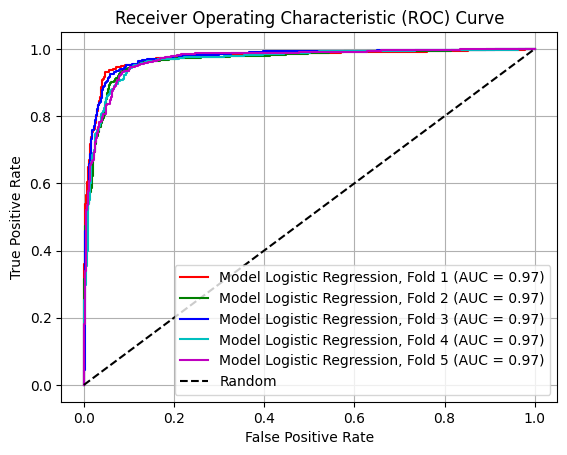

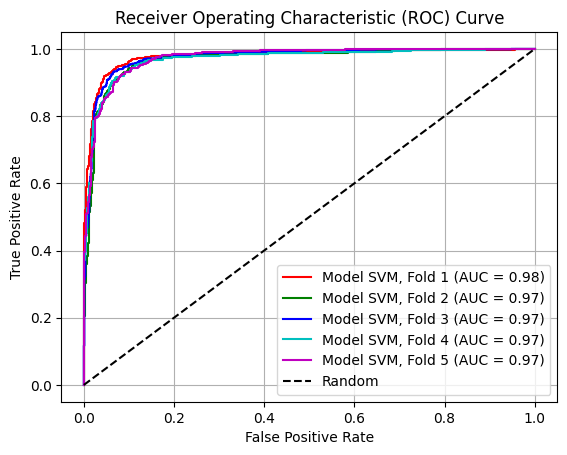

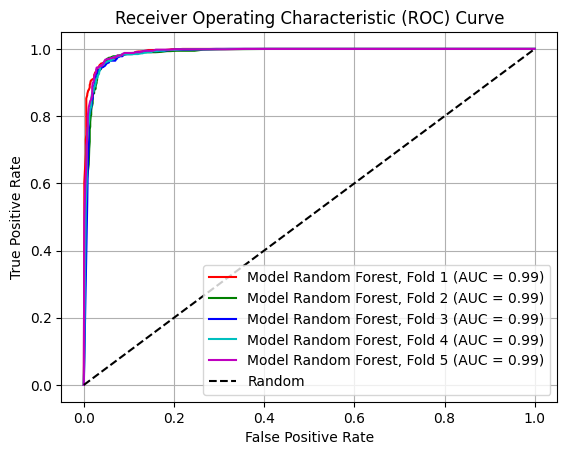

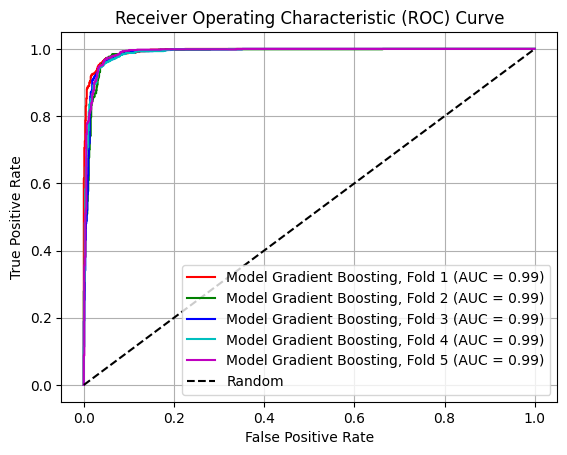

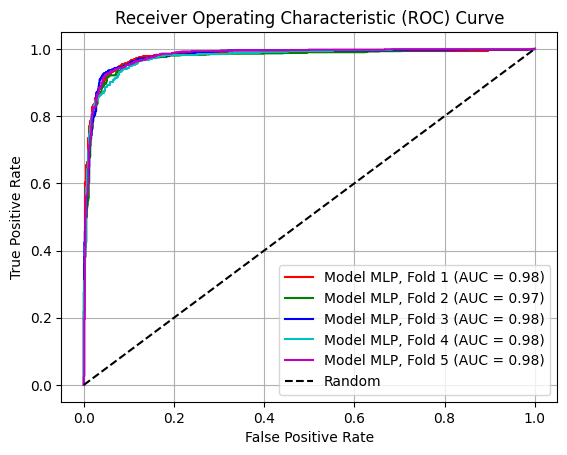

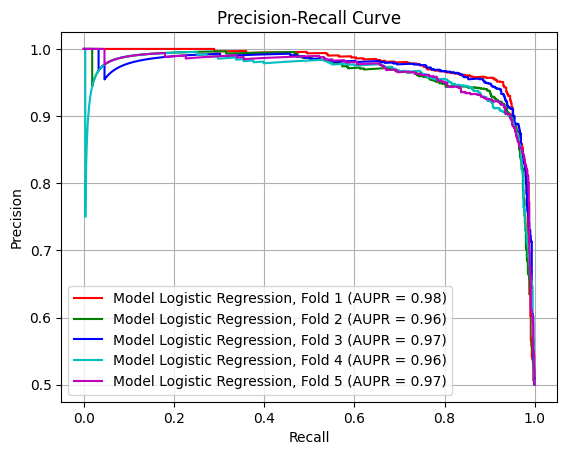

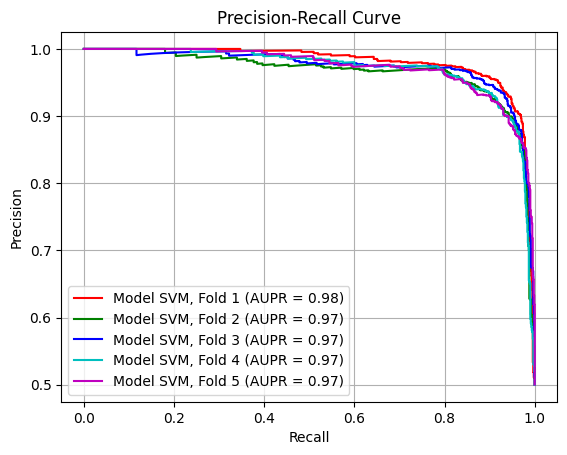

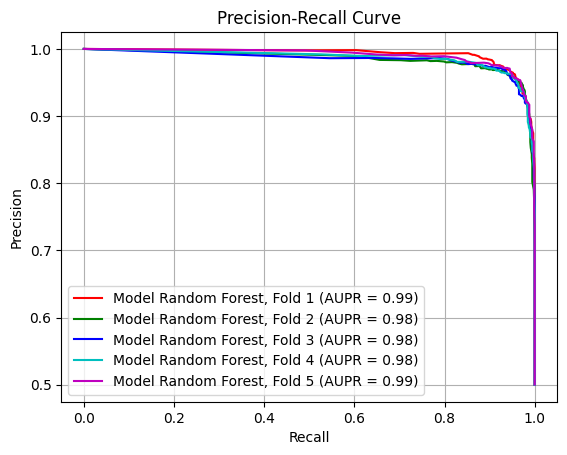

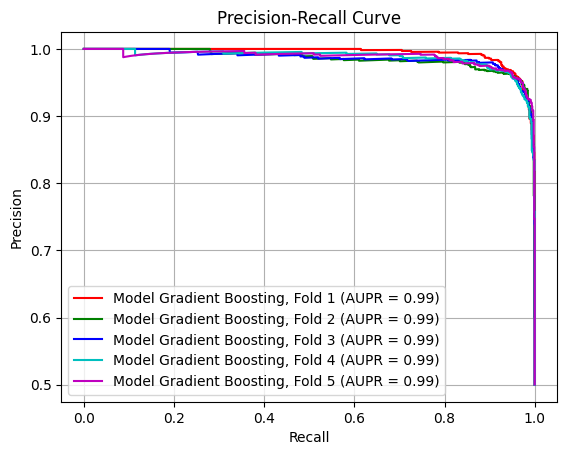

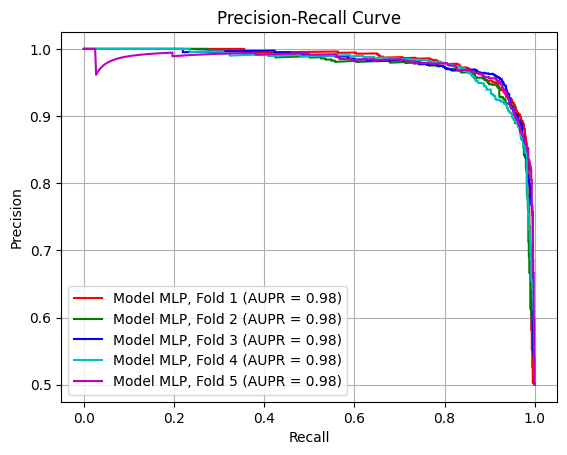

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming output1 contains ROC curve and Precision-Recall curve data for each model and fold

colors = ['r', 'g', 'b', 'c', 'm']  # List of colors for different models
model_names = list(output1.keys())  # List of model names
num_folds = 5  # Number of folds

# Plot ROC curves
for i, model_name in enumerate(model_names):
    for j,fold in enumerate(output1[model_name]):
        y_test, y_pred_proba= fold
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f'Model {model_name}, Fold {j+1} (AUC = {roc_auc:.2f})', color=colors[j])

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Precision-Recall curves
for i, model_name in enumerate(model_names):
    for j,fold in enumerate(output1[model_name]):
        y_test, y_pred_proba= fold
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        aupr = average_precision_score(y_test, y_pred_proba)
        plt.plot(recall, precision, label=f'Model {model_name}, Fold {j+1} (AUPR = {aupr:.2f})', color=colors[j])

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()



Meta-Model Metrics:
ROC AUC: 0.9977
Accuracy: 0.9755
Precision: 0.9694
Recall: 0.9821
F1-score: 0.9757
MCC: 0.9512
AUPR: 0.9977


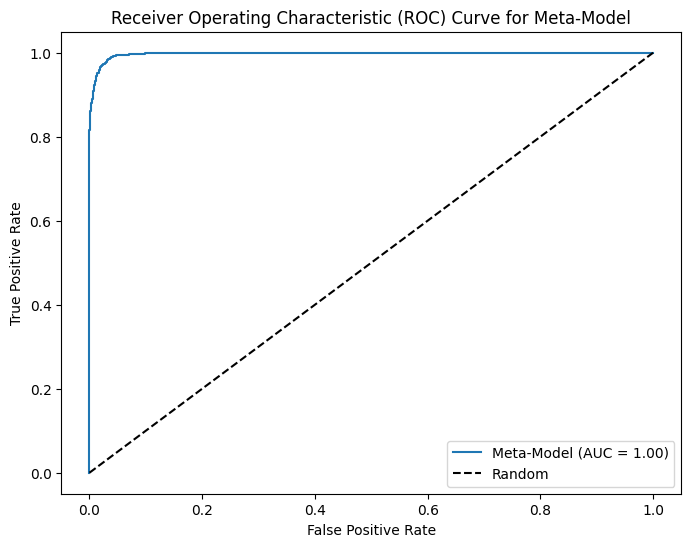

In [ ]:

# Create input features for the meta-model
meta_X = np.column_stack([predictions[model_name] for model_name in models1])

# Train the meta-model
meta_model1.fit(meta_X, y)

# Evaluate the meta-model
y_meta_pred_proba = meta_model1.predict_proba(meta_X)[:, 1]
y_meta_pred = (y_meta_pred_proba >= 0.5).astype(int)

# Display evaluation metrics for the meta-model
roc_auc_meta = roc_auc_score(y, y_meta_pred_proba)
accuracy_meta = accuracy_score(y, y_meta_pred)
precision_meta = precision_score(y, y_meta_pred)
recall_meta = recall_score(y, y_meta_pred)
f1_meta = f1_score(y, y_meta_pred)
mcc_meta = matthews_corrcoef(y, y_meta_pred)
aupr_meta = average_precision_score(y, y_meta_pred_proba)

print("\nMeta-Model Metrics:")
print(f"ROC AUC: {roc_auc_meta:.4f}")
print(f"Accuracy: {accuracy_meta:.4f}")
print(f"Precision: {precision_meta:.4f}")
print(f"Recall: {recall_meta:.4f}")
print(f"F1-score: {f1_meta:.4f}")
print(f"MCC: {mcc_meta:.4f}")
print(f"AUPR: {aupr_meta:.4f}")

# Plot ROC curve for the meta-model
fpr_meta, tpr_meta, thresholds_meta = roc_curve(y, y_meta_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_meta, tpr_meta, label=f'Meta-Model (AUC = {roc_auc_meta:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Meta-Model')
plt.legend()
plt.show()


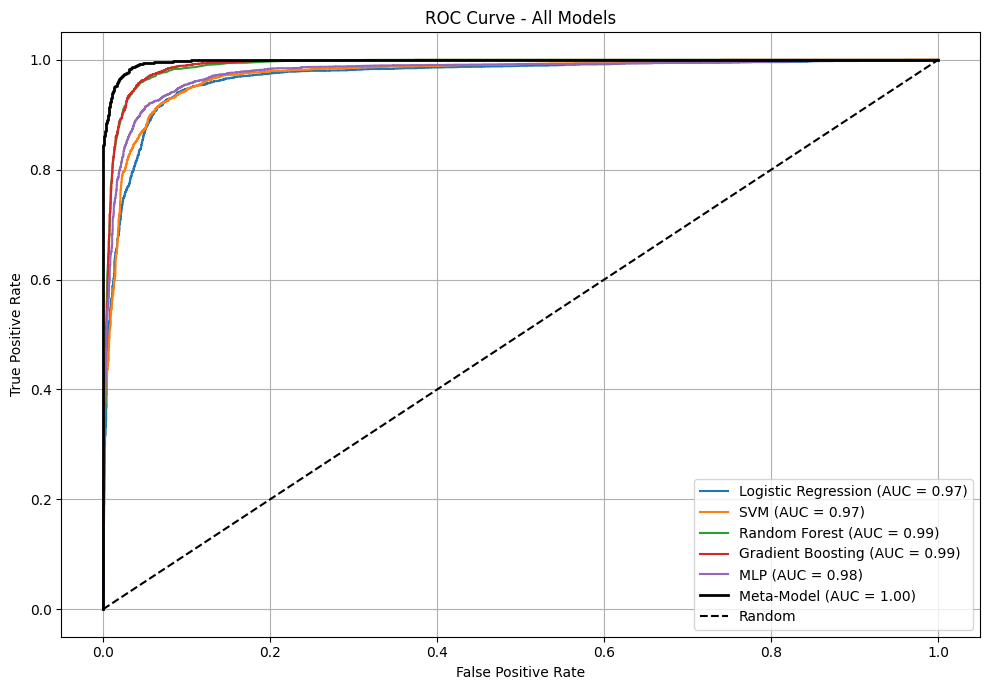

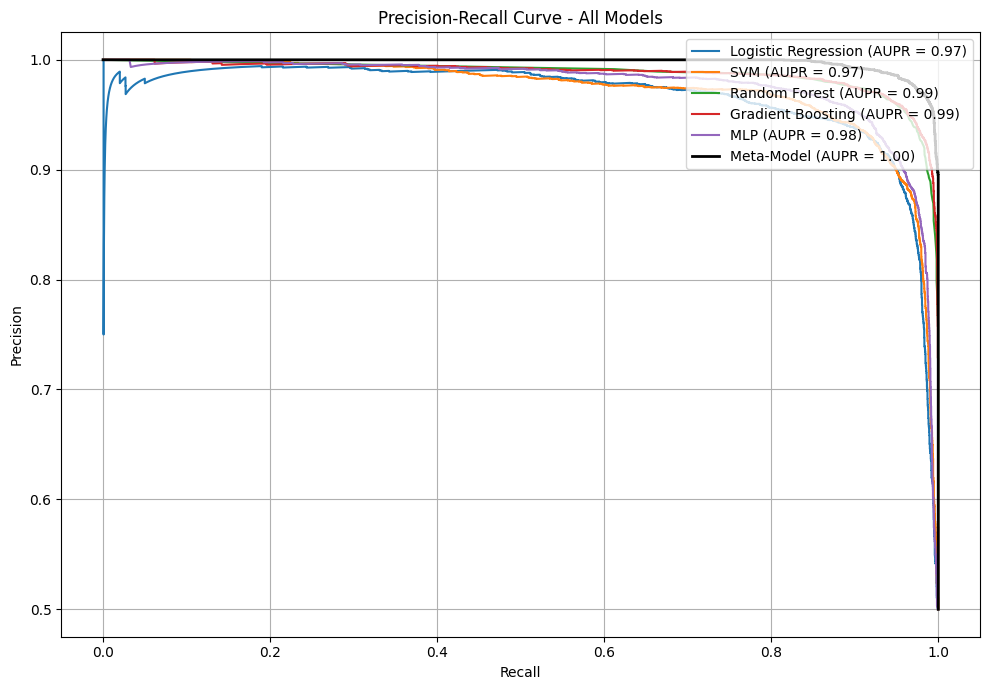

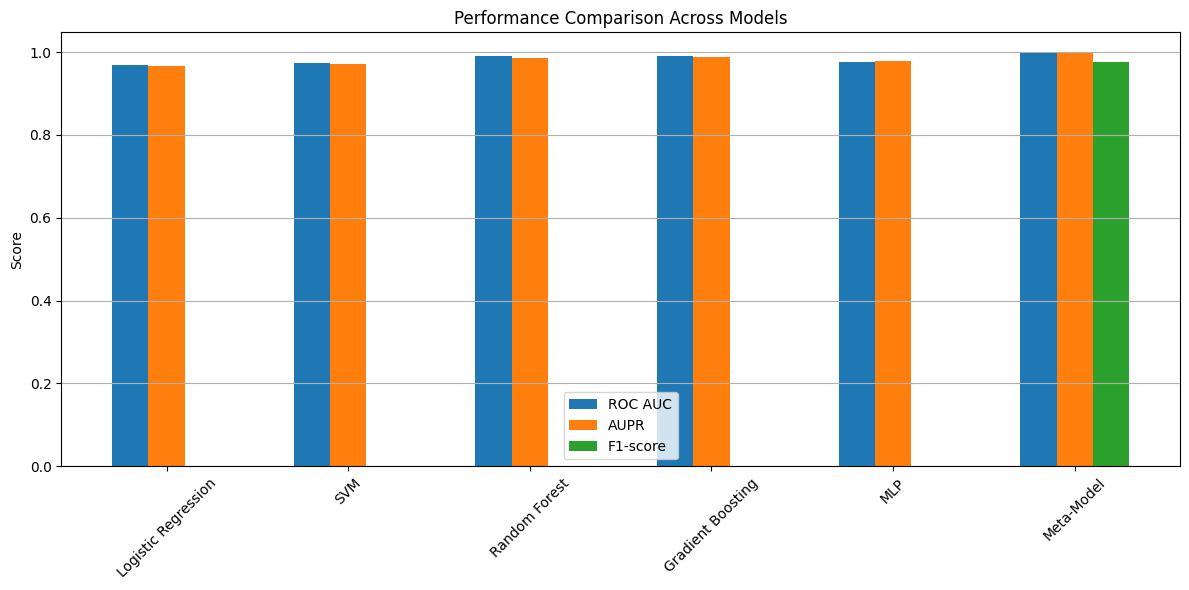

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
)

# Store final evaluation metrics per model
final_metrics = {}

# ROC Curve Plot
plt.figure(figsize=(10, 7))
for model_name in output1:
    y_all = np.concatenate([fold[0] for fold in output1[model_name]])
    y_scores = np.concatenate([fold[1] for fold in output1[model_name]])
    fpr, tpr, _ = roc_curve(y_all, y_scores)
    auc = roc_auc_score(y_all, y_scores)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    final_metrics[model_name] = {'ROC AUC': auc}

# Meta-model ROC Curve
fpr_meta, tpr_meta, _ = roc_curve(y, y_meta_pred_proba)
plt.plot(fpr_meta, tpr_meta, label=f"Meta-Model (AUC = {roc_auc_meta:.2f})", color='black', linewidth=2)

# Final touches
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve Plot
plt.figure(figsize=(10, 7))
for model_name in output1:
    y_all = np.concatenate([fold[0] for fold in output1[model_name]])
    y_scores = np.concatenate([fold[1] for fold in output1[model_name]])
    precision, recall, _ = precision_recall_curve(y_all, y_scores)
    aupr = average_precision_score(y_all, y_scores)
    plt.plot(recall, precision, label=f"{model_name} (AUPR = {aupr:.2f})")
    final_metrics[model_name]['AUPR'] = aupr

# Meta-model PR Curve
precision_meta_curve, recall_meta_curve, _ = precision_recall_curve(y, y_meta_pred_proba)
plt.plot(recall_meta_curve, precision_meta_curve, label=f"Meta-Model (AUPR = {aupr_meta:.2f})", color='black', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - All Models')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Add other metrics for meta-model
final_metrics['Meta-Model'] = {
    'ROC AUC': roc_auc_meta,
    'AUPR': aupr_meta,
    'Accuracy': accuracy_meta,
    'Precision': precision_meta,
    'Recall': recall_meta,
    'F1-score': f1_meta,
    'MCC': mcc_meta
}

# Plot bar chart for key metrics
metrics_to_plot = ['ROC AUC', 'AUPR', 'F1-score']
plt.figure(figsize=(12, 6))
bar_width = 0.2
models = list(final_metrics.keys())
x = np.arange(len(models))

for i, metric in enumerate(metrics_to_plot):
    values = [final_metrics[m].get(metric, 0) for m in models]
    plt.bar(x + i * bar_width, values, width=bar_width, label=metric)

plt.xticks(x + bar_width, models, rotation=45)
plt.ylabel('Score')
plt.title('Performance Comparison Across Models')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


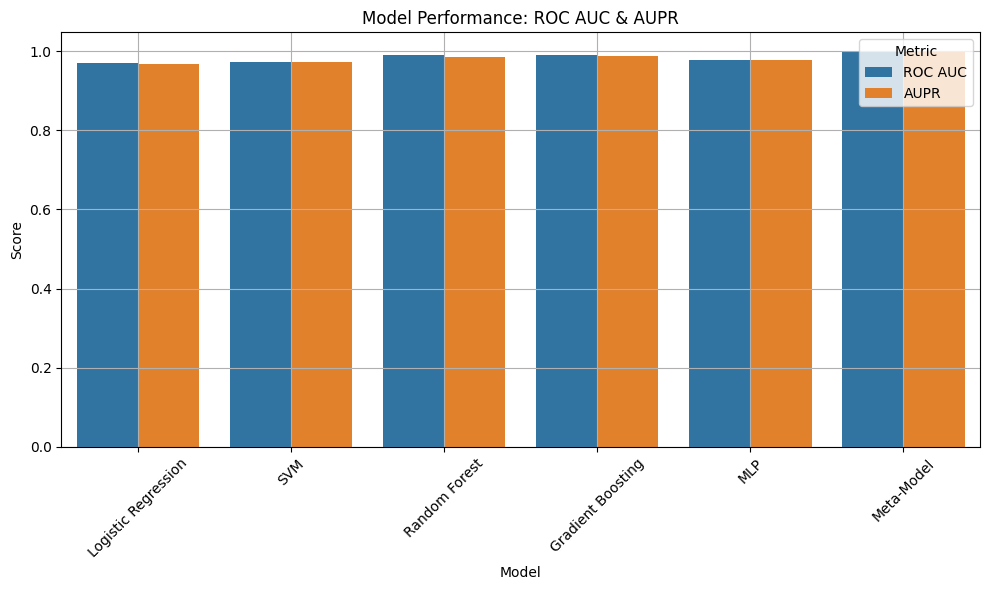

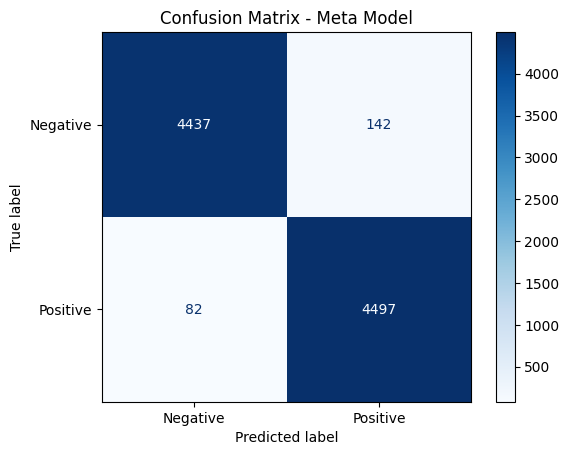

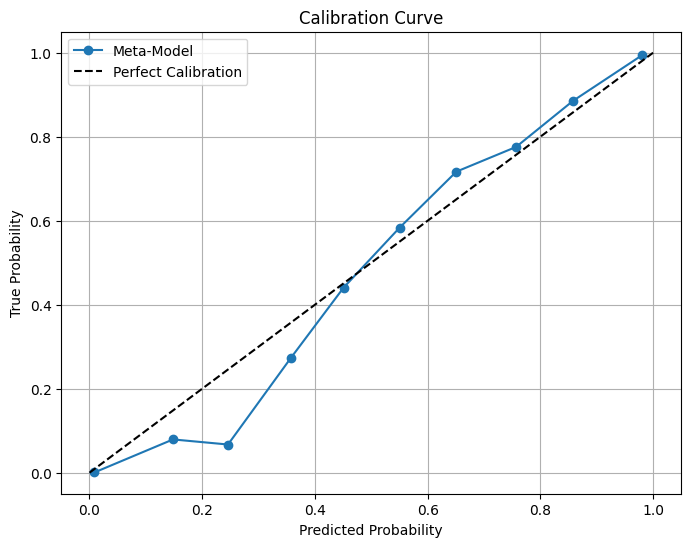

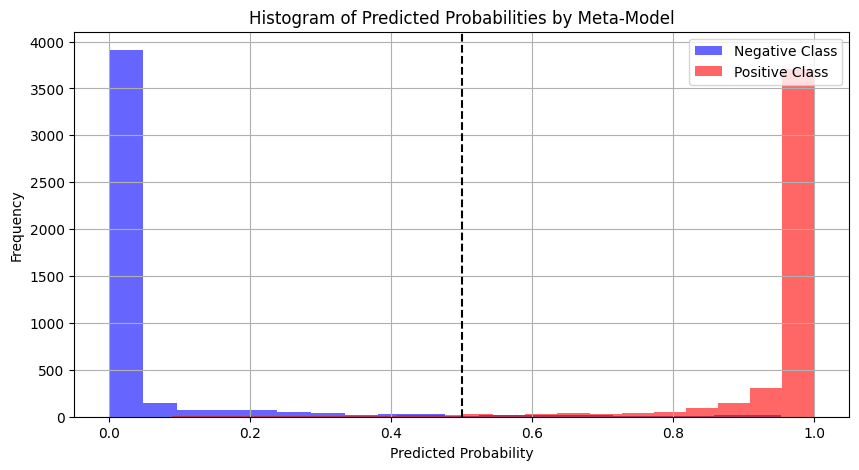

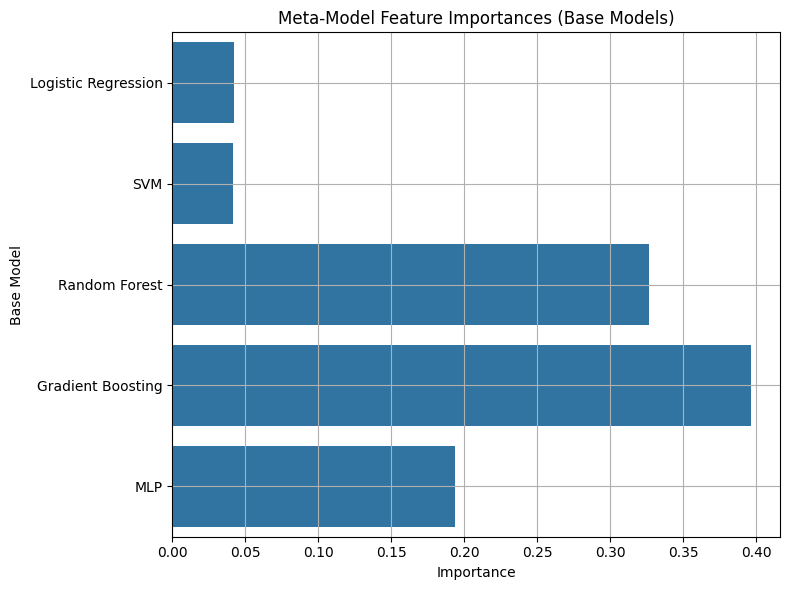

In [ ]:
import seaborn as sns
import pandas as pd

# Aggregate AUC and AUPR per model
model_auc_aupr = []

for model_name in model_names:
    all_y = []
    all_preds = []
    for y_test, y_pred_proba in output1[model_name]:
        all_y.extend(y_test)
        all_preds.extend(y_pred_proba)
    auc = roc_auc_score(all_y, all_preds)
    aupr = average_precision_score(all_y, all_preds)
    model_auc_aupr.append({'Model': model_name, 'ROC AUC': auc, 'AUPR': aupr})

# Add meta-model
model_auc_aupr.append({
    'Model': 'Meta-Model',
    'ROC AUC': roc_auc_meta,
    'AUPR': aupr_meta
})

df_auc_aupr = pd.DataFrame(model_auc_aupr)
df_auc_aupr_melted = df_auc_aupr.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_auc_aupr_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance: ROC AUC & AUPR')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_meta_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Meta Model')
plt.grid(False)
plt.show()

from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y, y_meta_pred_proba, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Meta-Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(y_meta_pred_proba[y == 0], bins=20, alpha=0.6, label='Negative Class', color='blue')
plt.hist(y_meta_pred_proba[y == 1], bins=20, alpha=0.6, label='Positive Class', color='red')
plt.axvline(x=0.5, linestyle='--', color='black')
plt.title('Histogram of Predicted Probabilities by Meta-Model')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

importances = meta_model1.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=list(models1.keys()))
plt.title('Meta-Model Feature Importances (Base Models)')
plt.xlabel('Importance')
plt.ylabel('Base Model')
plt.grid(True)
plt.tight_layout()
plt.show()


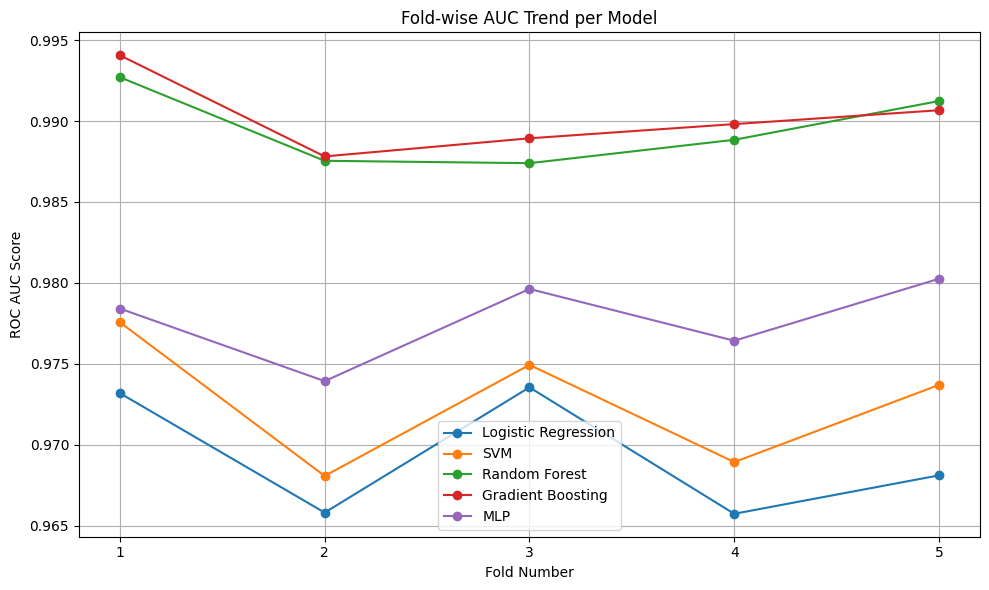

In [ ]:
plt.figure(figsize=(10, 6))
for model_name in model_names:
    auc_scores = [roc_auc_score(y, y_pred) for y, y_pred in output1[model_name]]
    plt.plot(range(1, 6), auc_scores, marker='o', label=model_name)

plt.xticks(range(1, 6))
plt.xlabel('Fold Number')
plt.ylabel('ROC AUC Score')
plt.title('Fold-wise AUC Trend per Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, average_precision_score,
    roc_curve
)

X_shuffled = X[indices]
y1 = y[indices]
X1 = X_shuffled
y = y1

# ====== 1. Base models with regularization ======

models1 = {
    'Logistic Regression': LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        max_iter=1000
    ),
    'SVM': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        min_samples_split=5,
        min_samples_leaf=2,
        subsample=0.8,
        max_features='sqrt',
        random_state=42
    ),
    'MLP': MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=300,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        random_state=42
    )
}

# ====== 2. Meta-model (base) ======

meta_model1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

# ====== 3. Cross-validation & base-model predictions ======

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()

predictions = {model_name: [] for model_name in models1}
output1 = {model_name: [] for model_name in models1}

for train_index, test_index in skf.split(X1, y):
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train1_std = scaler.fit_transform(X_train1)
    X_test1_std = scaler.transform(X_test1)

    for model_name, model in models1.items():
        model.fit(X_train1_std, y_train)
        y_pred_proba = model.predict_proba(X_test1_std)[:, 1]
        predictions[model_name].extend(y_pred_proba)
        output1[model_name].append((y_test, y_pred_proba))

# ====== 4. Build out-of-fold meta-features ======

meta_X = np.column_stack([
    cross_val_predict(
        model,
        X1, y,
        cv=skf,
        method='predict_proba'
    )[:, 1]
    for model in models1.values()
])

# ====== 5. Feature selection on meta-features ======

selector = VarianceThreshold(threshold=0.01)
meta_X_sel = selector.fit_transform(meta_X)

# ====== 6. Bagged meta-model for feature “dropout” ======


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'


Meta-Model Metrics:
ROC AUC: 0.9982
Accuracy: 0.9762
Precision: 0.9684
Recall: 0.9845
F1-score: 0.9764
MCC: 0.9525
AUPR: 0.9982


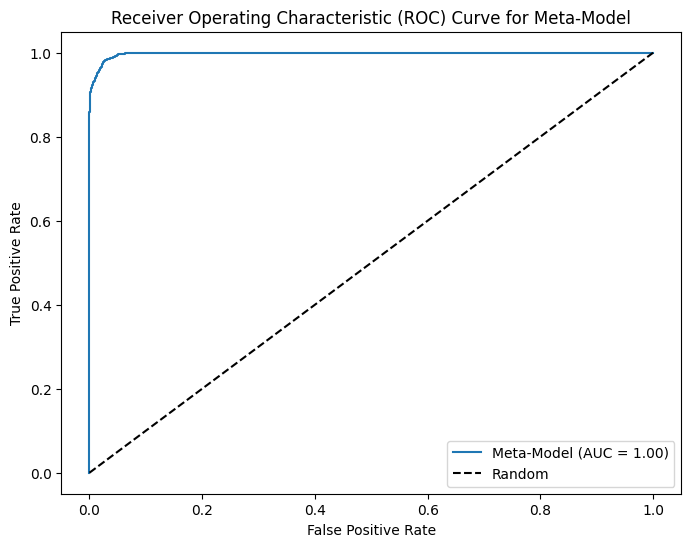

In [ ]:
meta_model1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.7,     # use 70% of meta‐features at each split (“feature dropout”)
    max_samples=0.8,      # bootstrap 80% of samples for each tree (“row dropout”)
    bootstrap=True,
    random_state=42
)

# Fit on the selected meta-features
meta_model1.fit(meta_X_sel, y)

# ====== 7. Evaluate meta-model ======

y_meta_pred_proba = meta_model1.predict_proba(meta_X_sel)[:, 1]
y_meta_pred = (y_meta_pred_proba >= 0.5).astype(int)

roc_auc_meta = roc_auc_score(y, y_meta_pred_proba)
accuracy_meta = accuracy_score(y, y_meta_pred)
precision_meta = precision_score(y, y_meta_pred)
recall_meta = recall_score(y, y_meta_pred)
f1_meta = f1_score(y, y_meta_pred)
mcc_meta = matthews_corrcoef(y, y_meta_pred)
aupr_meta = average_precision_score(y, y_meta_pred_proba)

print("\nMeta-Model Metrics:")
print(f"ROC AUC: {roc_auc_meta:.4f}")
print(f"Accuracy: {accuracy_meta:.4f}")
print(f"Precision: {precision_meta:.4f}")
print(f"Recall: {recall_meta:.4f}")
print(f"F1-score: {f1_meta:.4f}")
print(f"MCC: {mcc_meta:.4f}")
print(f"AUPR: {aupr_meta:.4f}")

# ====== 8. Plot ROC curve ======

fpr_meta, tpr_meta, thresholds_meta = roc_curve(y, y_meta_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_meta, tpr_meta, label=f'Meta-Model (AUC = {roc_auc_meta:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Meta-Model')
plt.legend()
plt.show()

In [ ]:
with open("scaler1.pickle", 'wb') as file:
    pickle.dump(scaler, file)

with open("base_models1.pickle", 'wb') as file:
    pickle.dump(models1, file)

with open("meta_model1.pickle", 'wb') as file:
    pickle.dump(meta_model1, file)


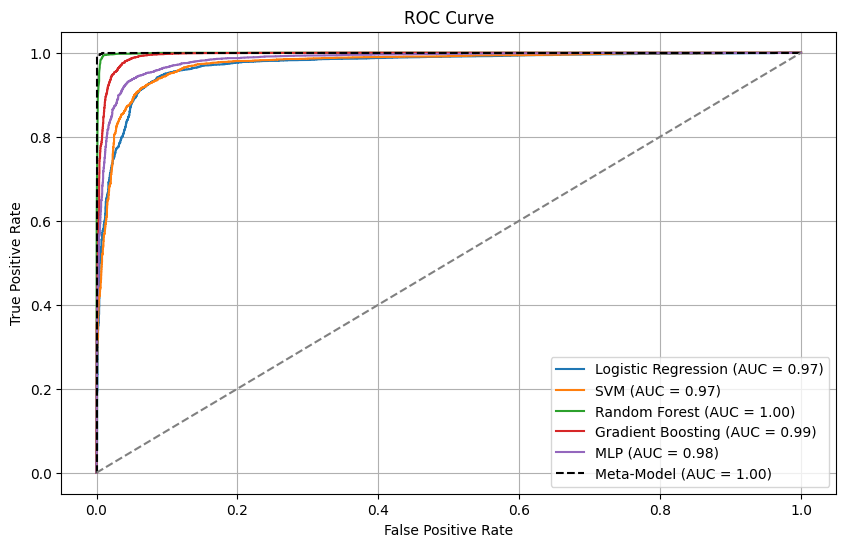

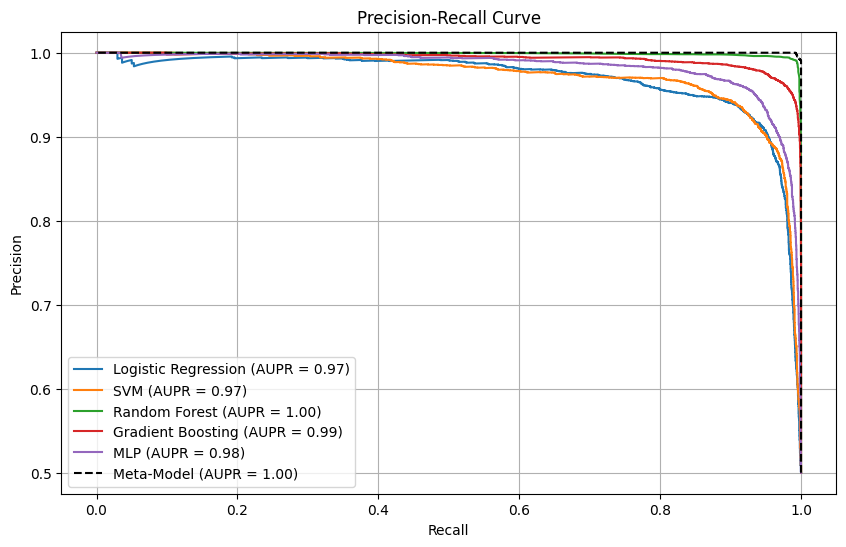

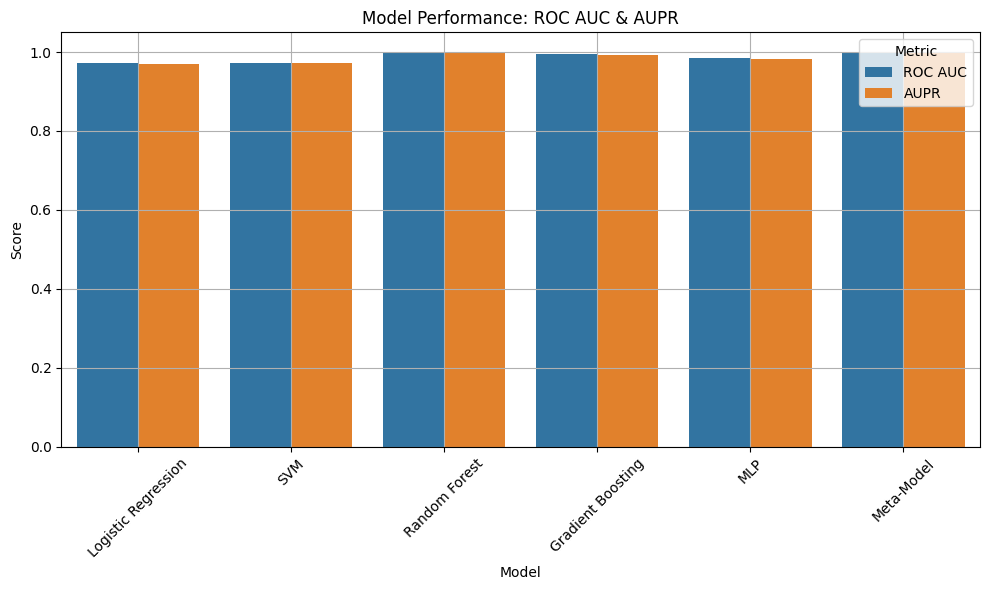

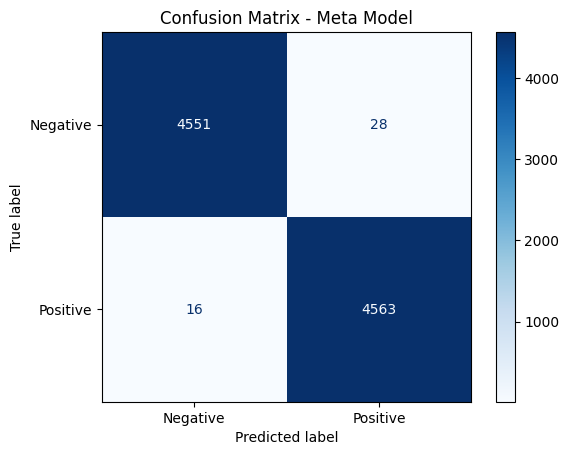

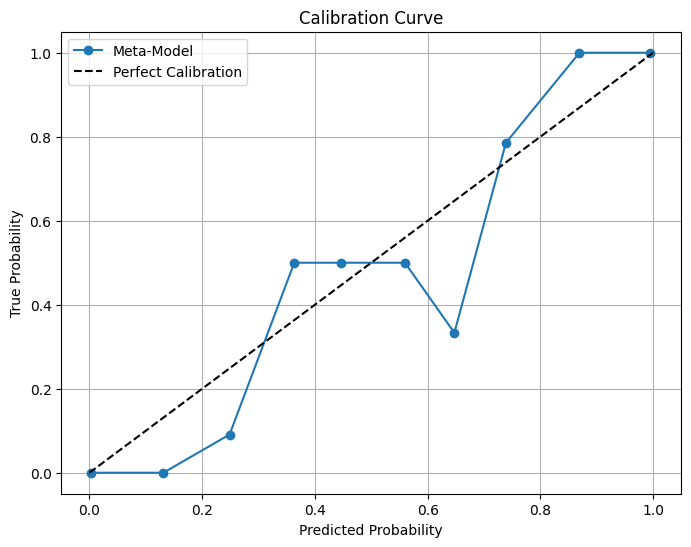

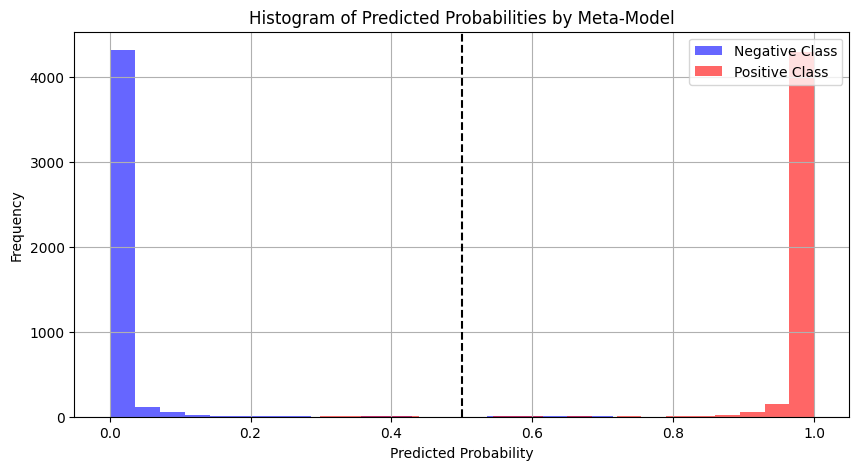

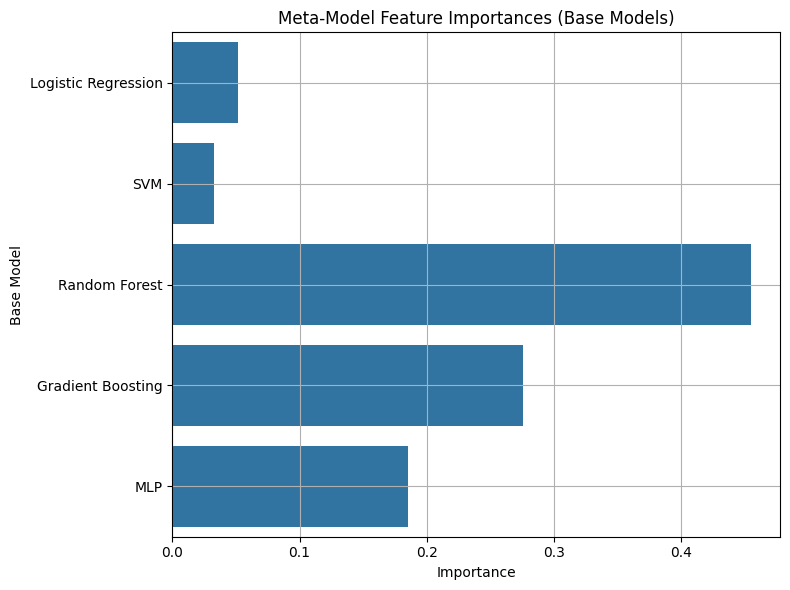

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import calibration_curve

# ----------------------------
# Load Pickle Files
# ----------------------------
with open("scaler1.pickle", 'rb') as file:
    scaler = pickle.load(file)

with open("base_models1.pickle", 'rb') as file:
    models1 = pickle.load(file)

with open("meta_model1.pickle", 'rb') as file:
    meta_model1 = pickle.load(file)

# ----------------------------
# Assume you already have X, y
# ----------------------------
X_scaled = scaler.transform(X)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

output1 = {model_name: [] for model_name in models1.keys()}
meta_X = []
meta_y = []
meta_y_pred_proba = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    meta_features = []

    for model_name, model in models1.items():
        # model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        output1[model_name].append((y_test, y_pred_proba))
        meta_features.append(y_pred_proba)

    meta_X_fold = np.array(meta_features).T
    meta_y.extend(y_test)

    meta_model1.fit(meta_X_fold, y_test)
    y_meta_pred_proba_fold = meta_model1.predict_proba(meta_X_fold)[:, 1]
    meta_y_pred_proba.extend(y_meta_pred_proba_fold)

# Convert to numpy arrays
meta_y = np.array(meta_y)
meta_y_pred_proba = np.array(meta_y_pred_proba)
y_meta_pred = (meta_y_pred_proba >= 0.5).astype(int)

# ----------------------------
# 1. ROC and PR Curves
# ----------------------------
model_names = list(models1.keys())

# ROC Curve
plt.figure(figsize=(10, 6))
for model_name in model_names:
    all_y = []
    all_preds = []
    for y_test, y_pred_proba in output1[model_name]:
        all_y.extend(y_test)
        all_preds.extend(y_pred_proba)
    fpr, tpr, _ = roc_curve(all_y, all_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

fpr_meta, tpr_meta, _ = roc_curve(meta_y, meta_y_pred_proba)
roc_auc_meta = auc(fpr_meta, tpr_meta)
plt.plot(fpr_meta, tpr_meta, label=f"Meta-Model (AUC = {roc_auc_meta:.2f})", linestyle='--', color='black')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# PR Curve
plt.figure(figsize=(10, 6))
for model_name in model_names:
    all_y = []
    all_preds = []
    for y_test, y_pred_proba in output1[model_name]:
        all_y.extend(y_test)
        all_preds.extend(y_pred_proba)
    precision, recall, _ = precision_recall_curve(all_y, all_preds)
    pr_auc = average_precision_score(all_y, all_preds)
    plt.plot(recall, precision, label=f"{model_name} (AUPR = {pr_auc:.2f})")

precision_meta, recall_meta, _ = precision_recall_curve(meta_y, meta_y_pred_proba)
aupr_meta = average_precision_score(meta_y, meta_y_pred_proba)
plt.plot(recall_meta, precision_meta, label=f"Meta-Model (AUPR = {aupr_meta:.2f})", linestyle='--', color='black')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 2. Bar Plot: AUC & AUPR
# ----------------------------
model_auc_aupr = []
for model_name in model_names:
    all_y = []
    all_preds = []
    for y_test, y_pred_proba in output1[model_name]:
        all_y.extend(y_test)
        all_preds.extend(y_pred_proba)
    auc_score = roc_auc_score(all_y, all_preds)
    aupr_score = average_precision_score(all_y, all_preds)
    model_auc_aupr.append({'Model': model_name, 'ROC AUC': auc_score, 'AUPR': aupr_score})

model_auc_aupr.append({'Model': 'Meta-Model', 'ROC AUC': roc_auc_meta, 'AUPR': aupr_meta})

df_auc_aupr = pd.DataFrame(model_auc_aupr)
df_auc_aupr_melted = df_auc_aupr.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_auc_aupr_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance: ROC AUC & AUPR')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Confusion Matrix
# ----------------------------
cm = confusion_matrix(meta_y, y_meta_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Meta Model')
plt.grid(False)
plt.show()

# ----------------------------
# 4. Calibration Curve
# ----------------------------
prob_true, prob_pred = calibration_curve(meta_y, meta_y_pred_proba, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Meta-Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 5. Histogram of Predicted Probabilities
# ----------------------------
plt.figure(figsize=(10, 5))
plt.hist(meta_y_pred_proba[meta_y == 0], bins=20, alpha=0.6, label='Negative Class', color='blue')
plt.hist(meta_y_pred_proba[meta_y == 1], bins=20, alpha=0.6, label='Positive Class', color='red')
plt.axvline(x=0.5, linestyle='--', color='black')
plt.title('Histogram of Predicted Probabilities by Meta-Model')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 6. Meta-Model Feature Importances
# ----------------------------
importances = meta_model1.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=list(models1.keys()))
plt.title('Meta-Model Feature Importances (Base Models)')
plt.xlabel('Importance')
plt.ylabel('Base Model')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install scikit-learn==1.1.3  # or whichever version you originally used


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.


Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP
Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM
Random Forest
Gradient Boosting
MLP


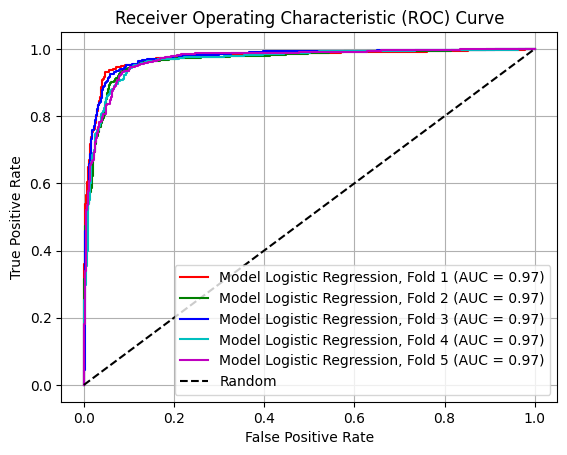

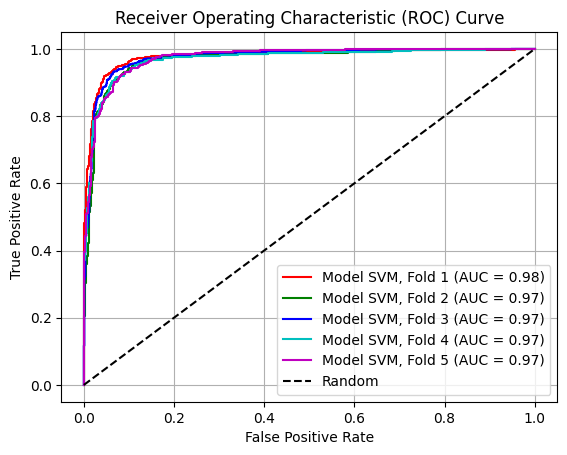

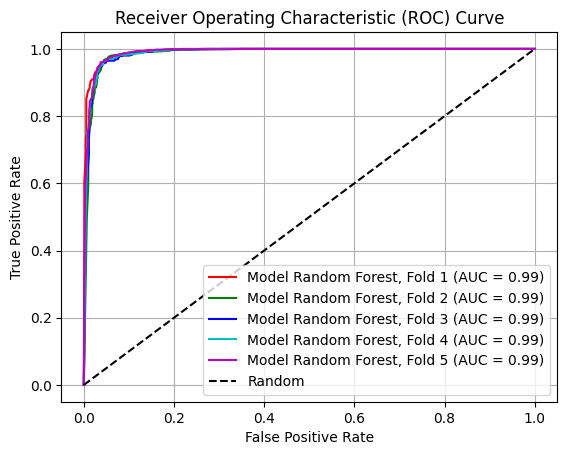

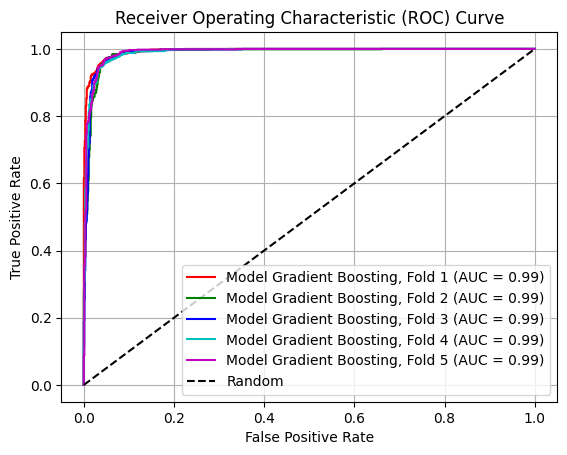

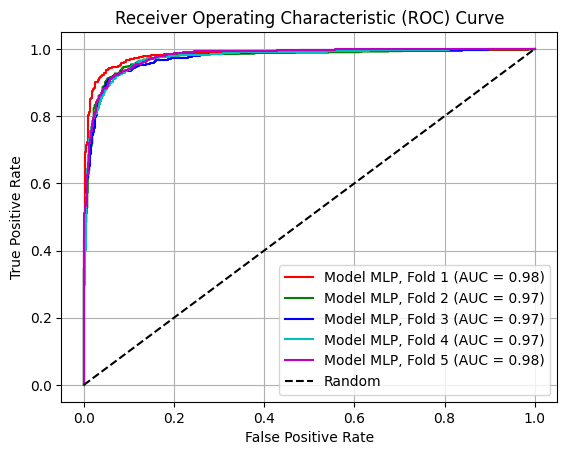

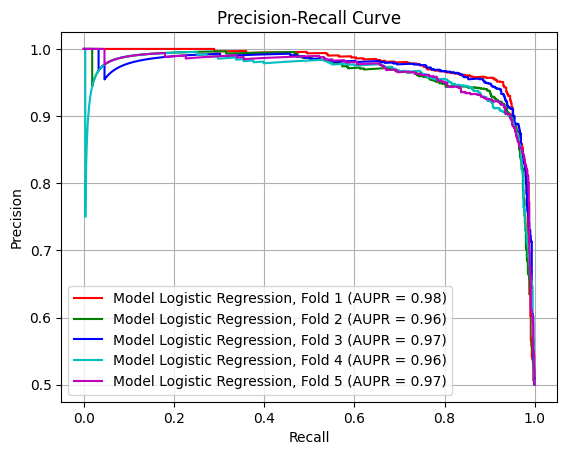

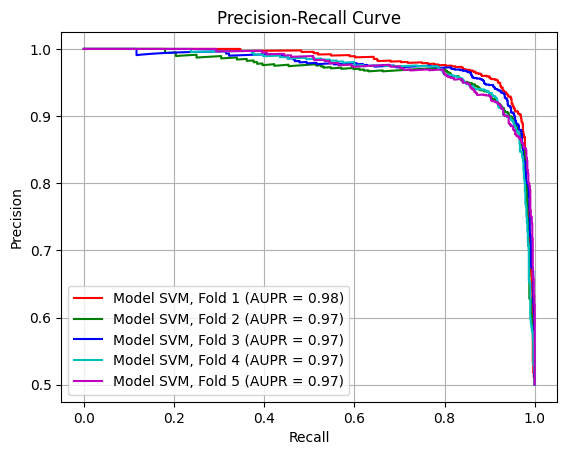

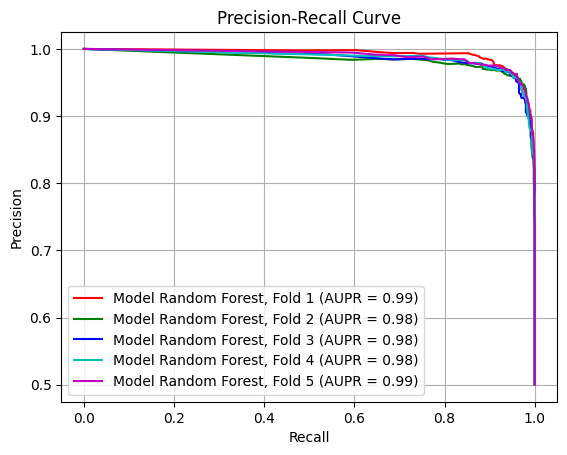

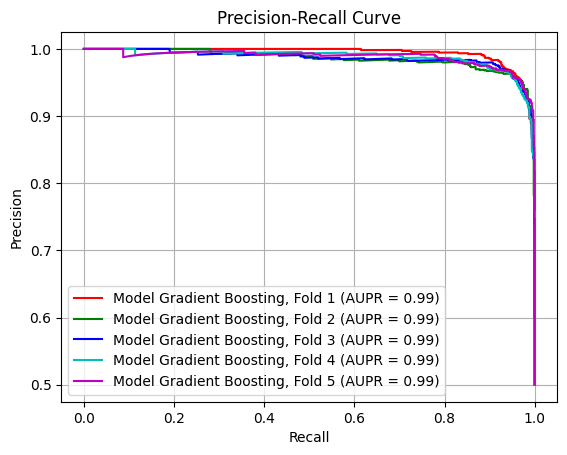

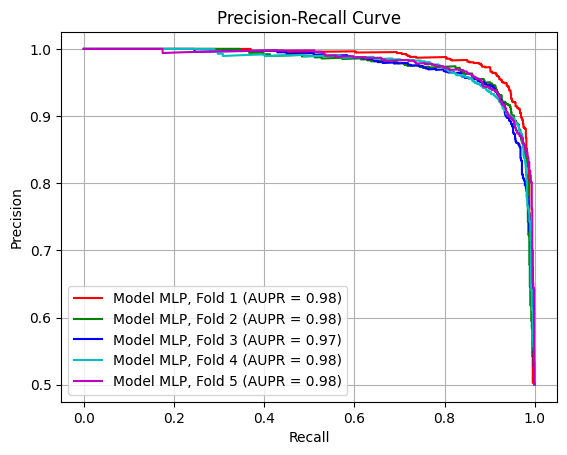


Meta-Model Metrics:
ROC AUC: 0.9976
Accuracy: 0.9736
Precision: 0.9672
Recall: 0.9803
F1-score: 0.9738
MCC: 0.9472
AUPR: 0.9976


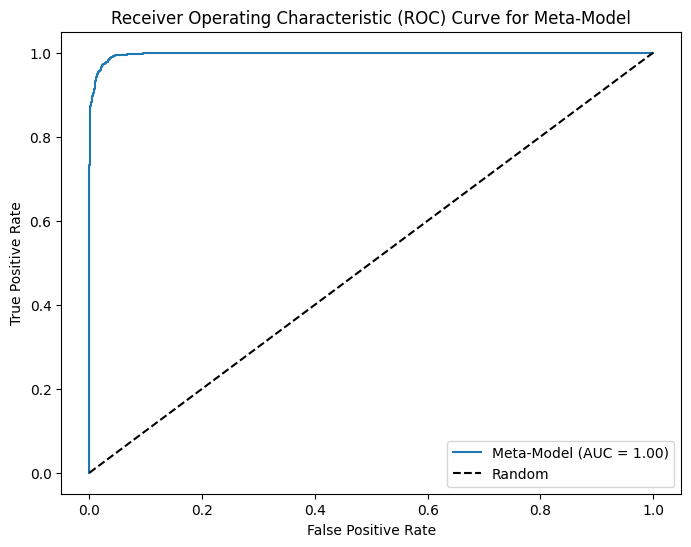

In [ ]:
# This is the prediction using the nodes where bias is towards lncRNA sequence and disease semantic information



# Shuffling all datasets using the same shuffled indices
X_shuffled = X[indices]
y1 = y[indices]
X1 = X_shuffled
y = y1

# Models for binary classification
models1 = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(max_iter=300)  # Adjust parameters as needed
}

# Meta-model
meta_model1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Leave-One-Out Cross-Validation with shuffling
skf = StratifiedKFold(n_splits=5)  # StratifiedKFold for shuffling

predictions = {model_name: [] for model_name in models1}

scaler = StandardScaler()
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
output1={
     'Logistic Regression': [],
    'SVM': [],
    'Random Forest': [],
    'Gradient Boosting': [],
    'MLP': []  # Adjust parameters as needed
}
for train_index, test_index in skf.split(X1, y):
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize features
    X_train1_std = scaler.fit_transform(X_train1)
    X_test1_std = scaler.transform(X_test1)

    # Train and predict with each base model
    for model_name, model in models1.items():
        print(model_name)
        model.fit(X_train1_std, y_train)
        y_pred_proba = model.predict_proba(X_test1_std)[:, 1]
        predictions[model_name].extend(y_pred_proba)
        output1[model_name].append((y_test,y_pred_proba))


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming output1 contains ROC curve and Precision-Recall curve data for each model and fold

colors = ['r', 'g', 'b', 'c', 'm']  # List of colors for different models
model_names = list(output1.keys())  # List of model names
num_folds = 5  # Number of folds

# Plot ROC curves
for i, model_name in enumerate(model_names):
    for j,fold in enumerate(output1[model_name]):
        y_test, y_pred_proba= fold
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f'Model {model_name}, Fold {j+1} (AUC = {roc_auc:.2f})', color=colors[j])

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Precision-Recall curves
for i, model_name in enumerate(model_names):
    for j,fold in enumerate(output1[model_name]):
        y_test, y_pred_proba= fold
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        aupr = average_precision_score(y_test, y_pred_proba)
        plt.plot(recall, precision, label=f'Model {model_name}, Fold {j+1} (AUPR = {aupr:.2f})', color=colors[j])

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# Create input features for the meta-model
meta_X = np.column_stack([predictions[model_name] for model_name in models1])

# Train the meta-model
meta_model1.fit(meta_X, y)

# Evaluate the meta-model
y_meta_pred_proba = meta_model1.predict_proba(meta_X)[:, 1]
y_meta_pred = (y_meta_pred_proba >= 0.5).astype(int)

# Display evaluation metrics for the meta-model
roc_auc_meta = roc_auc_score(y, y_meta_pred_proba)
accuracy_meta = accuracy_score(y, y_meta_pred)
precision_meta = precision_score(y, y_meta_pred)
recall_meta = recall_score(y, y_meta_pred)
f1_meta = f1_score(y, y_meta_pred)
mcc_meta = matthews_corrcoef(y, y_meta_pred)
aupr_meta = average_precision_score(y, y_meta_pred_proba)

print("\nMeta-Model Metrics:")
print(f"ROC AUC: {roc_auc_meta:.4f}")
print(f"Accuracy: {accuracy_meta:.4f}")
print(f"Precision: {precision_meta:.4f}")
print(f"Recall: {recall_meta:.4f}")
print(f"F1-score: {f1_meta:.4f}")
print(f"MCC: {mcc_meta:.4f}")
print(f"AUPR: {aupr_meta:.4f}")

# Plot ROC curve for the meta-model
fpr_meta, tpr_meta, thresholds_meta = roc_curve(y, y_meta_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_meta, tpr_meta, label=f'Meta-Model (AUC = {roc_auc_meta:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Meta-Model')
plt.legend()
plt.show()



In [ ]:
import pickle

# Save each component individually
with open('base_models.pkl', 'wb') as f:
    pickle.dump(models1, f)

with open('meta_model.pkl', 'wb') as f:
    pickle.dump(meta_model1, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('predictions.pkl', 'wb') as f:
    pickle.dump(predictions, f)

with open('output_folds.pkl', 'wb') as f:
    pickle.dump(output1, f)

# Save evaluation metrics as a dictionary
evaluation_metrics_meta = {
    'roc_auc': roc_auc_meta,
    'accuracy': accuracy_meta,
    'precision': precision_meta,
    'recall': recall_meta,
    'f1_score': f1_meta,
    'mcc': mcc_meta,
    'aupr': aupr_meta
}
with open('evaluation_metrics_meta.pkl', 'wb') as f:
    pickle.dump(evaluation_metrics_meta, f)

print("All components saved individually.")


All components saved individually.


In [ ]:
import pickle
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
! pip uninstall numpy pandas -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [ ]:
! pip install numpy==1.24.4 pandas==1.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 72.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4de

In [ ]:
from tensorflow import keras

# Load the old model
model = keras.models.load_model("encoder_lnc.h5")

# Save in TensorFlow SavedModel format (recommended for future compatibility)
model.save("encoder_lnc_saved_tf", save_format="tf")

# Optional: Also re-save in modern HDF5 format (not strictly needed)
model.save("encoder_lnc_resaved.h5")


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
from tensorflow import keras

# Load the old model
model = keras.models.load_model("encoder_dis.h5")

# Save in TensorFlow SavedModel format (recommended for future compatibility)
model.save("encoder_dis.keras")

# Optional: Also re-save in modern HDF5 format (not strictly needed)
model.save("encoder_lnc_resaved.h5")


In [ ]:
from tensorflow import keras

# Load the old model
model = keras.models.load_model("encoder_lnc.h5")

# Save in TensorFlow SavedModel format (recommended for future compatibility)
model.save("encoder_lnc.keras")

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.18.0
Keras version: 3.8.0


In [ ]:
import pandas as pd

# Top diseases for each lncRNA in Cluster 4015
lnc_disease_scores = {
    'LINC01141': {
        'hypoxic-ischemic': 0.7093, 'skin neoplasms': 0.7053, 'dermatomyositis': 0.7053,
        'hearing loss, noise-induced': 0.7053, 'kidney neoplasms': 0.7053, 'alzheimer disease': 0.6982,
        'colorectal neoplasia': 0.6982, 'adrenal cortex neoplasms': 0.6982,
        'cardiomyopathies': 0.6982, 'liver diseases, alcoholic': 0.6982
    },
    'APPAT': {
        'hypoxic-ischemic': 0.6969, 'dermatomyositis': 0.6965, 'hearing loss, noise-induced': 0.6965,
        'kidney neoplasms': 0.6965, 'skin neoplasms': 0.6965, 'phaeochromocytoma': 0.6958,
        'adolescent idiopathic scoliosis': 0.6958, 'peripheral artery disease': 0.6958,
        'restless legs syndrome': 0.6958, 'hepatitis b, chronic': 0.6958
    },
    'CARMN': {
        'hearing loss, noise-induced': 0.6715, 'skin neoplasms': 0.6715, 'dermatomyositis': 0.6715,
        'kidney neoplasms': 0.6672, 'hypoxic-ischemic': 0.6672, 'lung injury': 0.6637,
        'sarcoma, synovial': 0.6637, 'myocarditis': 0.6588, 'spinal chordoma': 0.6588,
        'cardiomyopathies': 0.6547
    },
    'MLIP-AS1': {
        'kidney neoplasms': 0.7093, 'hypoxic-ischemic': 0.7093, 'dermatomyositis': 0.7059,
        'skin neoplasms': 0.7059, 'hearing loss, noise-induced': 0.7059, 'lung injury': 0.7053,
        'sarcoma, synovial': 0.7053, 'endometriosis of ovary': 0.6928,
        'human spinocerebellar ataxia type 8': 0.6928, 'type 2 diabetes mellitus': 0.6928
    },
    'FOXG1-AS1': {
        'dermatomyositis': 0.7067, 'skin neoplasms': 0.7067, 'hearing loss, noise-induced': 0.7067,
        'kidney neoplasms': 0.7067, 'hypoxic-ischemic': 0.7067, 'lung injury': 0.7032,
        'sarcoma, synovial': 0.7032, 'spinal chordoma': 0.7026, 'myocarditis': 0.7026,
        'prostate cancer': 0.7026
    },
    'PCDH9-AS2': {
        'gastric cardia adenocarcinoma': 0.71, 'thyroid nodule': 0.71, 'endometriosis of ovary': 0.71,
        'clear cell renal cell carcinoma': 0.71, 'sepsis-induced cardiomyocyte pyroptosis': 0.71,
        'chronic sciatic nerve injury': 0.71, 'prostate cancer': 0.71,
        'cerebral ischemia/reperfusion injury': 0.71, 'type 2 diabetes mellitus': 0.71,
        'b-cell acute lymphoblastic leukemia': 0.71
    }
}

# Convert to DataFrame
df = pd.DataFrame(lnc_disease_scores).fillna(0)


In [ ]:
df.shape

(30, 6)

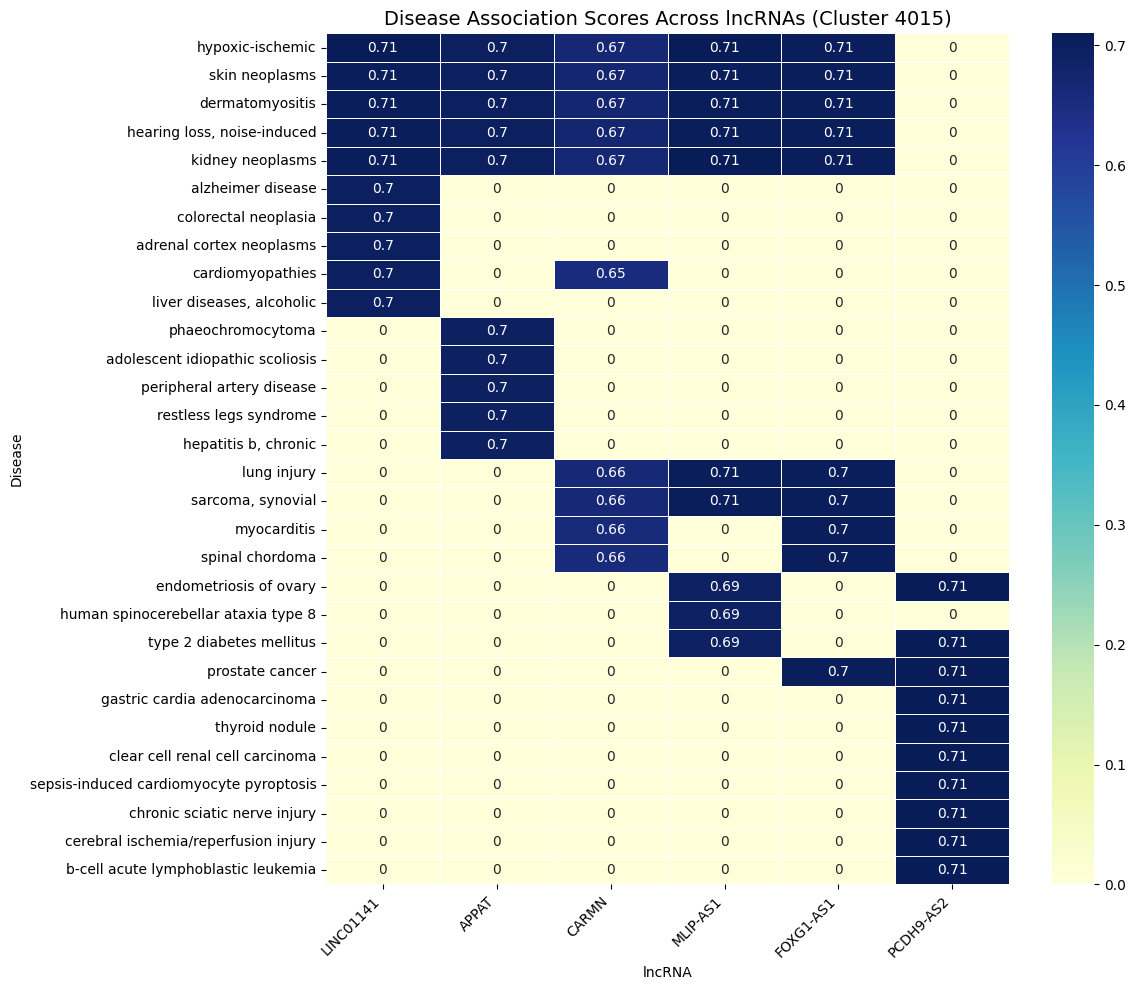

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title("Disease Association Scores Across lncRNAs (Cluster 4015)", fontsize=14)
plt.xlabel("lncRNA")
plt.ylabel("Disease")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


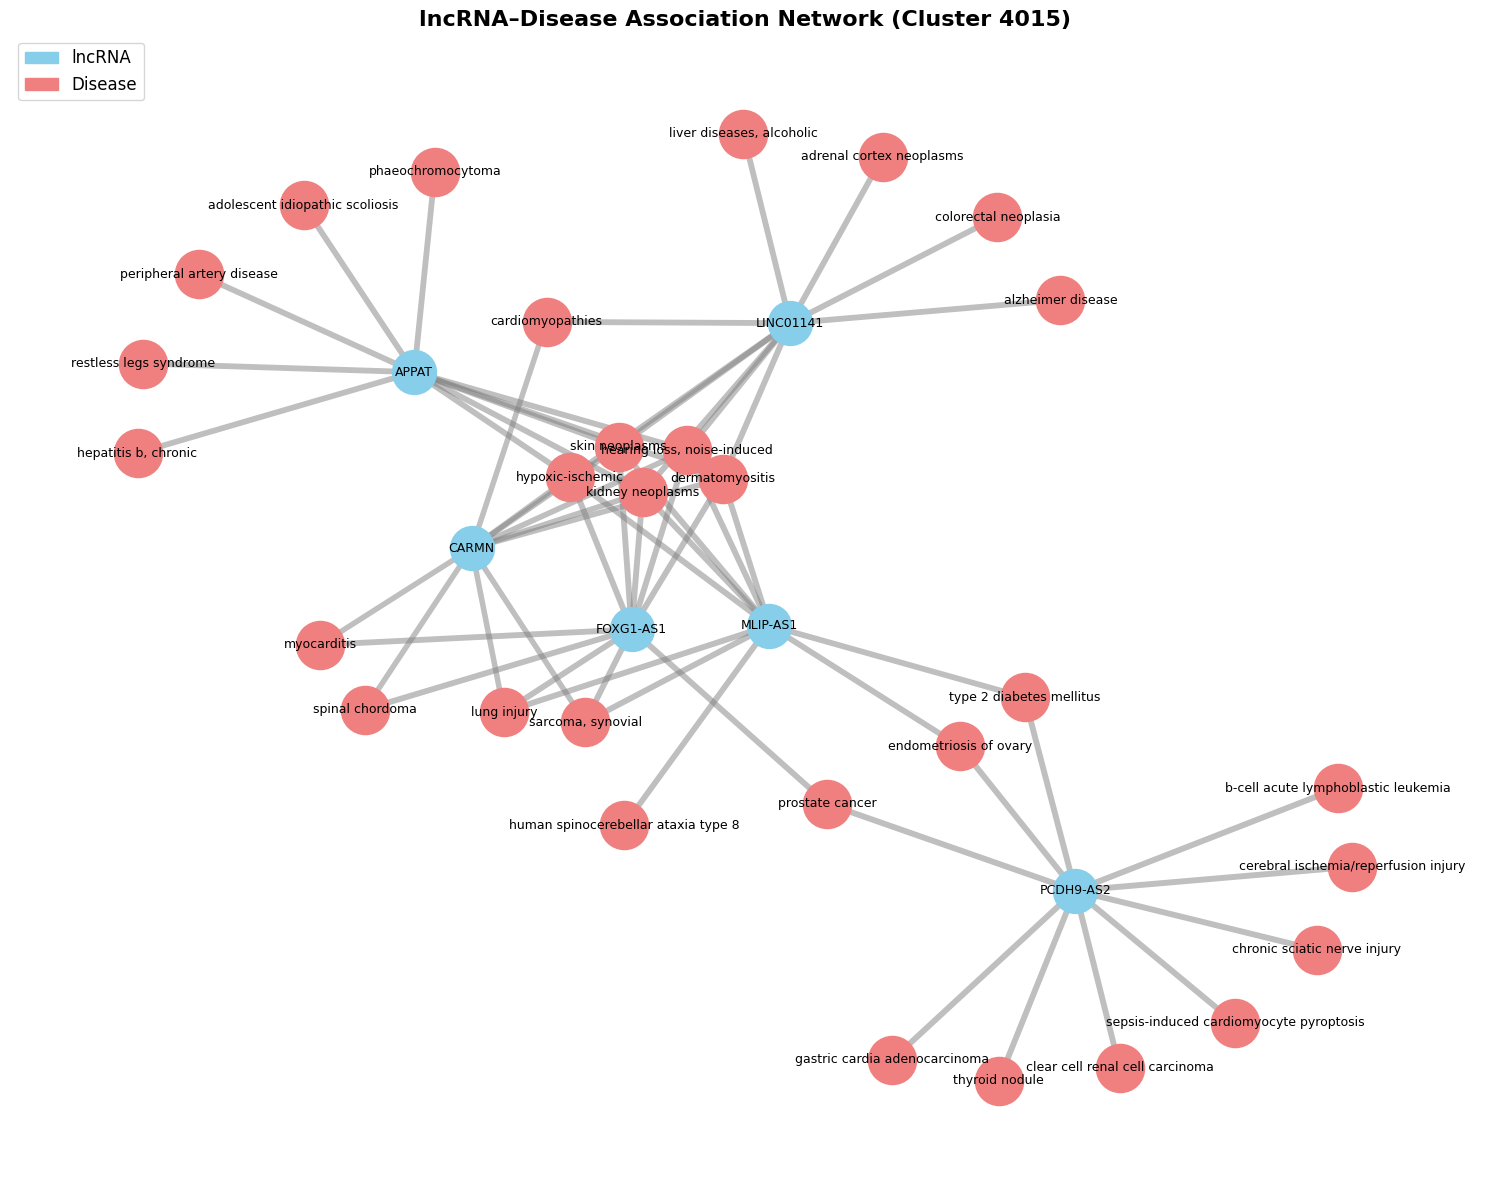

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create Graph
G = nx.Graph()

# Add nodes and edges with attributes
for lnc in lnc_disease_scores:
    G.add_node(lnc, type='lncRNA')
    for disease, score in lnc_disease_scores[lnc].items():
        G.add_node(disease, type='disease')
        G.add_edge(lnc, disease, weight=score)

# Position using Kamada-Kawai layout for better separation
pos = nx.kamada_kawai_layout(G)

# Split node types
lnc_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'lncRNA']
disease_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'disease']

# Extract edge weights
edges = G.edges(data=True)
weights = [d['weight'] * 6 for (_, _, d) in edges]  # Scale weights for visibility

# Plot
plt.figure(figsize=(15, 12))

# Draw nodes with colors by type
nx.draw_networkx_nodes(G, pos, nodelist=lnc_nodes, node_color='skyblue', node_size=1000, label='lncRNAs')
nx.draw_networkx_nodes(G, pos, nodelist=disease_nodes, node_color='lightcoral', node_size=1200, label='Diseases')

# Draw edges with transparency and width
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

# Add legend manually
lnc_patch = mpatches.Patch(color='skyblue', label='lncRNA')
disease_patch = mpatches.Patch(color='lightcoral', label='Disease')
plt.legend(handles=[lnc_patch, disease_patch], loc='upper left', fontsize=12)

plt.title("lncRNA–Disease Association Network (Cluster 4015)", fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Count disease occurrences across lncRNAs
disease_to_lnc = defaultdict(list)
for lnc, assoc in lnc_disease_scores.items():
    for disease in assoc:
        disease_to_lnc[disease].append((lnc, assoc[disease]))

# Step 2: Filter for common diseases (≥2 lncRNAs)
common_diseases = {disease: entries for disease, entries in disease_to_lnc.items() if len(entries) >= 1}

# Step 3: Prepare for bar plot
data = {
    "Disease": [],
    "lncRNA_Count": [],
    "Average_Score": [],
}

for disease, entries in common_diseases.items():
    scores = [score for _, score in entries]
    data["Disease"].append(disease)
    data["lncRNA_Count"].append(len(entries))
    data["Average_Score"].append(sum(scores) / len(scores))

df_common = pd.DataFrame(data).sort_values(by=["lncRNA_Count", "Average_Score"], ascending=[False, False])


In [ ]:
df_common

Disease  lncRNA_Count  Average_Score
0                          hypoxic-ischemic             5       0.697880
1                            skin neoplasms             5       0.697180
2                           dermatomyositis             5       0.697180
3               hearing loss, noise-induced             5       0.697180
4                          kidney neoplasms             5       0.697000
15                              lung injury             3       0.690733
16                        sarcoma, synovial             3       0.690733
22                          prostate cancer             2       0.706300
19                   endometriosis of ovary             2       0.701400
21                 type 2 diabetes mellitus             2       0.701400
17                              myocarditis             2       0.680700
18                          spinal chordoma             2       0.680700
8                          cardiomyopathies             2       0.676450
23            gastric cardia adenocarcinoma             1       0.710000
24                           thyroid nodule             1       0.710000
25          clear cell renal cell carcinoma             1       0.710000
26  sepsis-induced cardiomyocyte pyroptosis             1       0.710000
27             chronic sciatic nerve injury             1       0.710000
28     cerebral ischemia/reperfusion injury             1       0.710000
29      b-cell acute lymphoblastic leukemia             1       0.710000
5                         alzheimer disease             1       0.698200
6                      colorectal neoplasia             1       0.698200
7                  adrenal cortex neoplasms             1       0.698200
9                 liver diseases, alcoholic             1       0.698200
10                        phaeochromocytoma             1       0.695800
11          adolescent idiopathic scoliosis             1       0.695800
12                peripheral artery disease             1       0.695800
13                   restless legs syndrome             1       0.695800
14                     hepatitis b, chronic             1       0.695800
20      human spinocerebellar ataxia type 8             1       0.692800

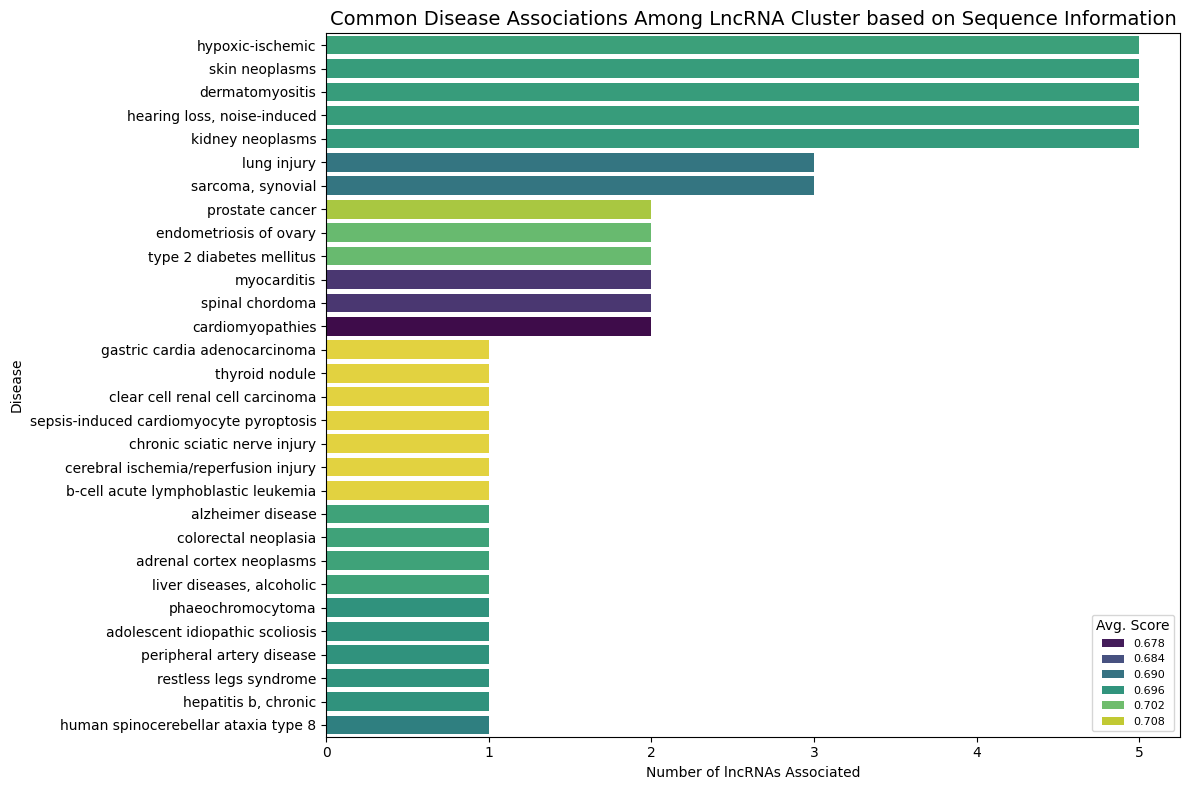

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_common, y="Disease", x="lncRNA_Count", palette="viridis", hue="Average_Score", dodge=False)

plt.title("Common Disease Associations Among LncRNA Cluster based on Sequence Information", fontsize=14)
plt.xlabel("Number of lncRNAs Associated")
plt.ylabel("Disease")
plt.legend(title="Avg. Score from GARNet", loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()


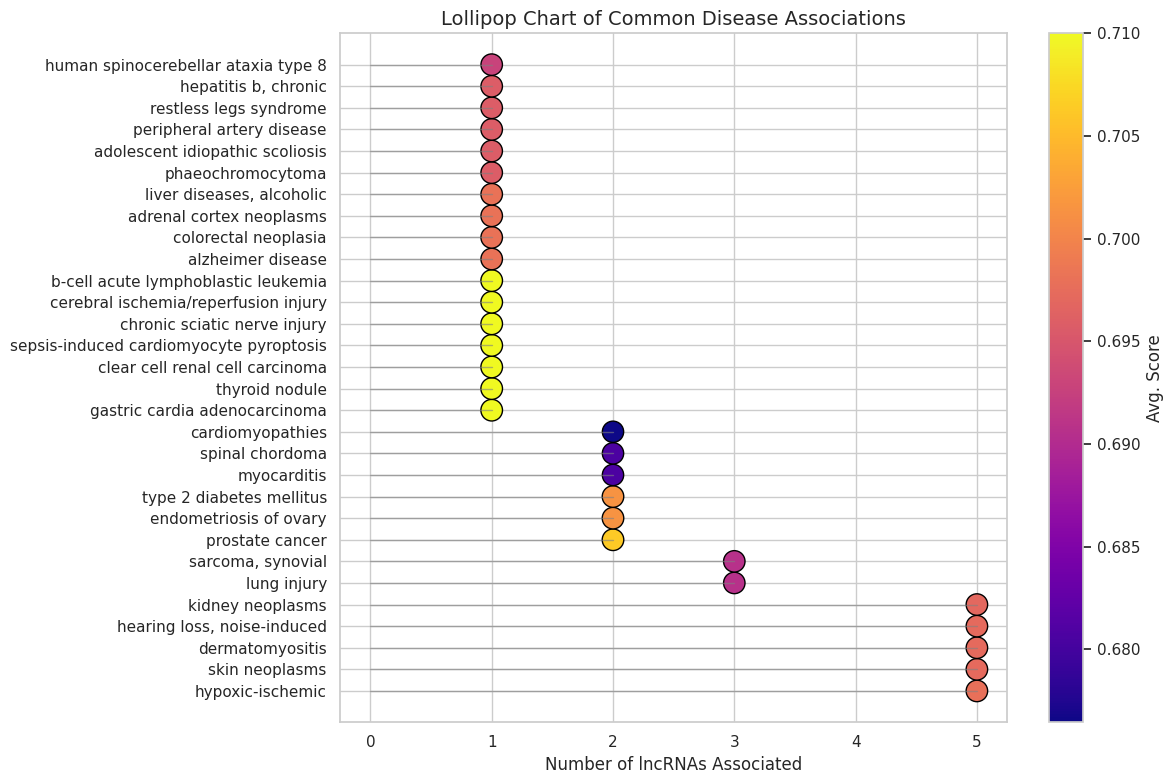

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot stem lines
for idx, row in df_common.iterrows():
    plt.plot([0, row["lncRNA_Count"]], [row["Disease"]] * 2, color='gray', lw=1, alpha=0.6)

# Plot lollipop heads
scatter = plt.scatter(
    df_common["lncRNA_Count"],
    df_common["Disease"],
    c=df_common["Average_Score"],
    cmap='plasma',
    s=100 + df_common["Average_Score"] * 200,
    edgecolors='black'
)

cbar = plt.colorbar(scatter)
cbar.set_label("Avg. Score")

plt.xlabel("Number of lncRNAs Associated")
plt.title("Lollipop Chart of Common Disease Associations", fontsize=14)
plt.tight_layout()
plt.show()


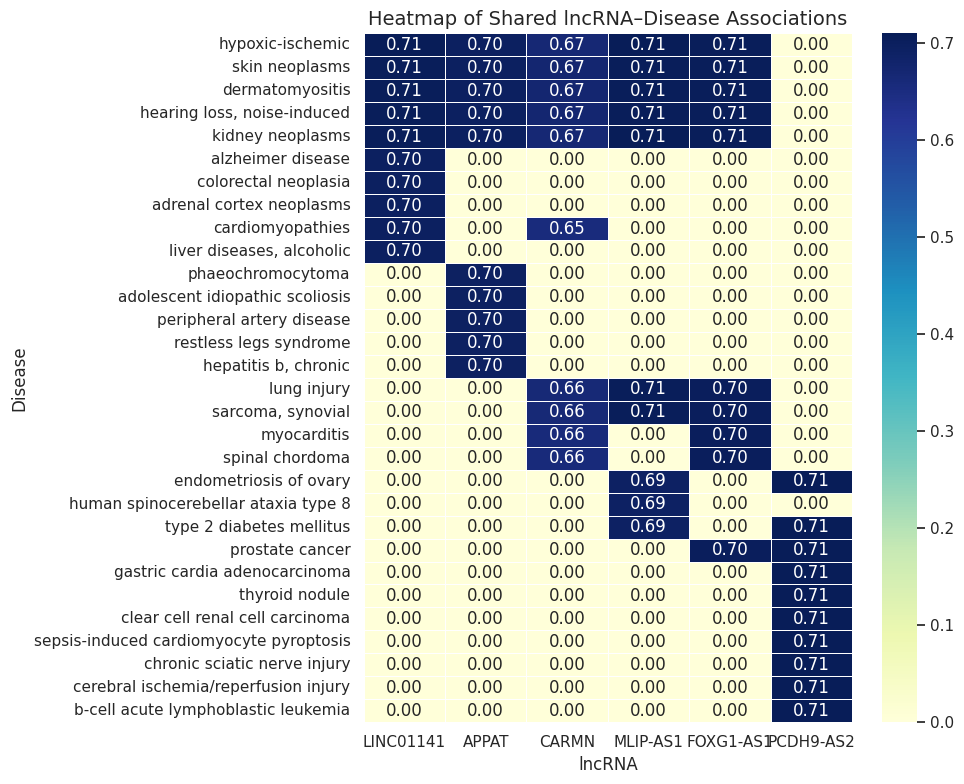

In [ ]:
# Step 1: Rebuild pairwise matrix
heatmap_data = defaultdict(dict)
for lnc, assoc in lnc_disease_scores.items():
    for disease, score in assoc.items():
        if disease in df_common["Disease"].values:
            heatmap_data[disease][lnc] = score

df_heatmap = pd.DataFrame(heatmap_data).T.fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Shared lncRNA–Disease Associations", fontsize=14)
plt.xlabel("lncRNA")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()


In [ ]:
for disease, entries in common_diseases.items():
    lnc_list = [lnc for lnc, _ in entries]
    print(f"{disease}: {', '.join(lnc_list)}")


hypoxic-ischemic: LINC01141, APPAT, CARMN, MLIP-AS1, FOXG1-AS1
skin neoplasms: LINC01141, APPAT, CARMN, MLIP-AS1, FOXG1-AS1
dermatomyositis: LINC01141, APPAT, CARMN, MLIP-AS1, FOXG1-AS1
hearing loss, noise-induced: LINC01141, APPAT, CARMN, MLIP-AS1, FOXG1-AS1
kidney neoplasms: LINC01141, APPAT, CARMN, MLIP-AS1, FOXG1-AS1
cardiomyopathies: LINC01141, CARMN
lung injury: CARMN, MLIP-AS1, FOXG1-AS1
sarcoma, synovial: CARMN, MLIP-AS1, FOXG1-AS1
myocarditis: CARMN, FOXG1-AS1
spinal chordoma: CARMN, FOXG1-AS1
endometriosis of ovary: MLIP-AS1, PCDH9-AS2
type 2 diabetes mellitus: MLIP-AS1, PCDH9-AS2
prostate cancer: FOXG1-AS1, PCDH9-AS2


In [ ]:
from collections import defaultdict
import pandas as pd

# Using the same lnc_disease_scores dictionary from earlier
disease_to_lncs = defaultdict(set)

# Build reverse mapping: disease -> set of lncRNAs
for lnc, disease_scores in lnc_disease_scores.items():
    for disease in disease_scores:
        disease_to_lncs[disease].add(lnc)

# Count lncRNAs per disease
disease_counts = {disease: len(lncs) for disease, lncs in disease_to_lncs.items()}

# Filter diseases shared by ≥2 lncRNAs
common_diseases = {d: c for d, c in disease_counts.items() if c >= 2}

# Sort by frequency
sorted_common = dict(sorted(common_diseases.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame
df_common = pd.DataFrame.from_dict(sorted_common, orient='index', columns=['LncRNA Count'])


In [ ]:
from collections import defaultdict
import pandas as pd

# Using the same lnc_disease_scores dictionary from earlier
disease_to_lncs = defaultdict(set)

# Build reverse mapping: disease -> set of lncRNAs
for lnc, disease_scores in lnc_disease_scores.items():
    for disease in disease_scores:
        disease_to_lncs[disease].add(lnc)

# Count lncRNAs per disease
disease_counts = {disease: len(lncs) for disease, lncs in disease_to_lncs.items()}

# Filter diseases shared by ≥2 lncRNAs
common_diseases = {d: c for d, c in disease_counts.items() if c >= 1}

# Sort by frequency
sorted_common = dict(sorted(common_diseases.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame
df_common = pd.DataFrame.from_dict(sorted_common, orient='index', columns=['LncRNA Count'])


<Figure size 1000x800 with 0 Axes>

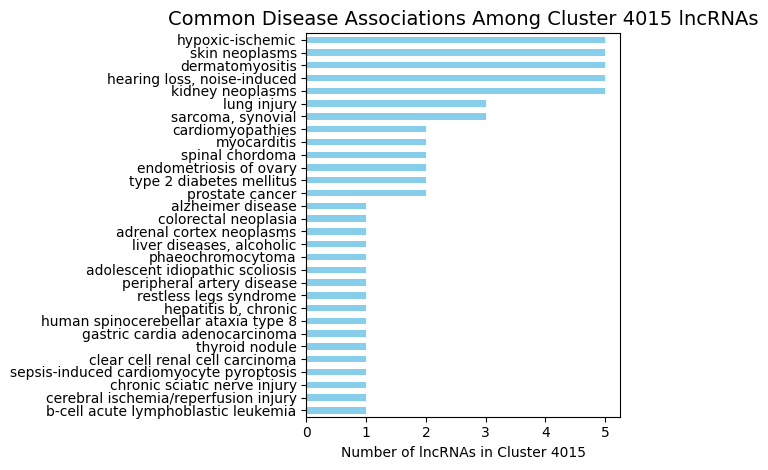

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
df_common.plot(kind='barh', legend=False, color='skyblue')
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel("Number of lncRNAs in Cluster 4015")
plt.title("Common Disease Associations Among Cluster 4015 lncRNAs", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Figure 6A data
source_labels = ['PubMed', 'PrediLnc']
diseases = [
    "Hypoxic-Ischemic Injury", "Kidney Neoplasms", "Skin Neoplasms",
    "Endometrial Stromal Sarcoma", "Dermatomyositis", "Noise-Induced Hearing Loss",
    "Adenoid Cystic Carcinoma", "Mood Disorders",
    "Myocardial Oxidative Stress", "Alzheimer’s Disease"
]
sources = [0 if i != 3 else 1 for i in range(len(diseases))]  # only index 3 has no PubMed evidence
targets = list(range(2, 12))  # shift to match unique indices for Plotly
values = [1]*10
colors = ['#FFA756' if i != 3 else '#7FB3D5' for i in range(10)]  # Orange if PubMed, Blue if PrediLnc only

figA = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=source_labels + diseases,
        color=["#FFA756", "#7FB3D5"] + ["gray"]*10
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    ))])

figA.update_layout(title_text="Figure 6A: HOTAIR lncRNA Disease Associations", font_size=12)
figA.show()


In [ ]:
import plotly.graph_objects as go

# Node labels
source_labels = ['PubMed', 'PrediLnc']
diseases = [
    "Hypoxic-Ischemic Injury", "Kidney Neoplasms", "Skin Neoplasms",
    "Endometrial Stromal Sarcoma", "Dermatomyositis", "Noise-Induced Hearing Loss",
    "Adenoid Cystic Carcinoma", "Mood Disorders",
    "Myocardial Oxidative Stress", "Alzheimer’s Disease"
]
all_labels = source_labels + diseases

# Link data
sources = []
targets = []
values = []
colors = []

for i, disease in enumerate(diseases):
    disease_idx = i + 2  # target node index

    # PrediLnc always predicts
    sources.append(1)  # PrediLnc index
    targets.append(disease_idx)
    values.append(1)
    colors.append('#7FB3D5')  # Blue

    # PubMed evidence available for all except index 3
    if i != 3:
        sources.append(0)  # PubMed index
        targets.append(disease_idx)
        values.append(1)
        colors.append('#FFA756')  # Orange

# Create Sankey diagram
figA = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=["#FFA756", "#7FB3D5"] + ["gray"]*10
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    ))])

figA.update_layout(
    title_text="Figure 6A: HOTAIR lncRNA Disease Associations",
    font_size=12
)
figA.show()


In [ ]:
import plotly.graph_objects as go

def to_unicode_bold(text):
    """Convert ASCII letters to bold Unicode characters"""
    def bold_char(c):
        if 'A' <= c <= 'Z':
            return chr(ord(c) + 0x1D400 - ord('A'))
        elif 'a' <= c <= 'z':
            return chr(ord(c) + 0x1D41A - ord('a'))
        else:
            return c
    return ''.join(bold_char(c) for c in text)

# Labels
source_labels = ['PubMed', 'PrediLnc']
diseases = [
    "Hypoxic-Ischemic Injury", "Kidney Neoplasms", "Skin Neoplasms",
    "Endometrial Stromal Sarcoma", "Dermatomyositis", "Noise-Induced Hearing Loss",
    "Adenoid Cystic Carcinoma", "Mood Disorders",
    "Myocardial Oxidative Stress", "Alzheimer’s Disease"
]
bold_diseases = [to_unicode_bold(d) for d in diseases]
all_labels = source_labels + bold_diseases

# Link setup
sources, targets, values, colors = [], [], [], []
for i in range(10):
    idx = i + 2
    sources.append(1)
    targets.append(idx)
    values.append(1)
    colors.append('#4682B4')  # Blue for PrediLnc

    if i != 3:
        sources.append(0)
        targets.append(idx)
        values.append(1)
        colors.append('#E67E22')  # Orange for PubMed

figA = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.7),
        label=source_labels + bold_diseases,
        color=["#E67E22", "#4682B4"] + ["#FFFFFF"] * 10
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

figA.update_layout(
    title_text="Figure 6A: HOTAIR lncRNA Disease Associations",
    font_size=13,
    font=dict(color="black")
)
figA.show()


In [ ]:
# lncRNA names
lncRNAs = [
    "ADAMTS9-AS2", "A2M-AS1", "LINC00941", "HCG18", "A1BG-AS1",
    "LINC00520", "CRNDE", "SNHG16", "AFAP1-AS1", "BCAR4"
]
bold_lncs = [to_unicode_bold(l) for l in lncRNAs]
all_labels = source_labels + bold_lncs

# Link setup
sources, targets, values, colors = [], [], [], []
for i in range(10):
    idx = i + 2
    sources.append(1)
    targets.append(idx)
    values.append(1)
    colors.append('#4682B4')  # Blue for PrediLnc

    if i != 2:
        sources.append(0)
        targets.append(idx)
        values.append(1)
        colors.append('#E67E22')  # Orange for PubMed

figB = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.7),
        label=source_labels + bold_lncs,
        color=["#E67E22", "#4682B4"] + ["#FFFFFF"] * 10
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

figB.update_layout(
    title_text="Figure 6B: Predicted lncRNAs Associated with Breast Cancer",
    font_size=13,
    font=dict(color="black")
)
figB.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def to_unicode_bold(text):
    def bold_char(c):
        if 'A' <= c <= 'Z':
            return chr(ord(c) + 0x1D400 - ord('A'))
        elif 'a' <= c <= 'z':
            return chr(ord(c) + 0x1D41A - ord('a'))
        else:
            return c
    return ''.join(bold_char(c) for c in text)

# Shared colors
pubmed_color = '#E67E22'       # Confirmed by PubMed (Orange)
predilnc_color = '#4682B4'     # Predicted by PrediLnc (Blue)
neutral_node_color = "#F2F2F2"

# === Sankey A (LncRNA to Disease) ===
source_labels_A = ['PubMed', 'PrediLnc']
diseases_A = [
    "Hypoxic-Ischemic Injury", "Kidney Neoplasms", "Skin Neoplasms",
    "Endometrial Stromal Sarcoma", "Dermatomyositis", "Noise-Induced Hearing Loss",
    "Adenoid Cystic Carcinoma", "Mood Disorders",
    "Myocardial Oxidative Stress", "Alzheimer’s Disease"
]
bold_diseases_A = [to_unicode_bold(d) for d in diseases_A]
all_labels_A = source_labels_A + bold_diseases_A

sources_A, targets_A, values_A, colors_A = [], [], [], []
for i in range(10):
    idx = i + 2
    sources_A.append(1)
    targets_A.append(idx)
    values_A.append(1)
    colors_A.append(predilnc_color)
    if i != 3:
        sources_A.append(0)
        targets_A.append(idx)
        values_A.append(1)
        colors_A.append(pubmed_color)

# === Sankey B (Disease to lncRNA) ===
source_labels_B = ['PubMed', 'PrediLnc']
lncrnas_B = [
    "XIST", "NEAT1", "CASC2", "SNHG17", "MALAT1",
    "LINC00963", "WEE2-AS1", "SNHG16", "MIAT", "KCNQ5-AS1"
]
bold_lncrnas_B = [to_unicode_bold(l) for l in lncrnas_B]
all_labels_B = source_labels_B + bold_lncrnas_B

sources_B, targets_B, values_B, colors_B = [], [], [], []
for i in range(10):
    idx = i + 2
    sources_B.append(1)
    targets_B.append(idx)
    values_B.append(1)
    colors_B.append(predilnc_color)
    if i != 2:
        sources_B.append(0)
        targets_B.append(idx)
        values_B.append(1)
        colors_B.append(pubmed_color)

# === Subplots with domain type ===
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("A) LncRNA to Disease", "B) Disease to LncRNA")
)

fig.add_trace(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.7),
        label=all_labels_A,
        color=[pubmed_color, predilnc_color] + [neutral_node_color]*10
    ),
    link=dict(
        source=sources_A,
        target=targets_A,
        value=values_A,
        color=colors_A
    )
), row=1, col=1)

fig.add_trace(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.7),
        label=all_labels_B,
        color=[pubmed_color, predilnc_color] + [neutral_node_color]*10
    ),
    link=dict(
        source=sources_B,
        target=targets_B,
        value=values_B,
        color=colors_B
    )
), row=1, col=2)

# === Layout & Custom Legend ===
fig.update_layout(
    title_text="Figure 6: Predicted and Confirmed lncRNA–Disease Associations",
    font_size=13,
    height=600,
    width=1200,
    margin=dict(t=60, l=30, r=30, b=30),
    annotations=[
        dict(
            x=0.32, y=-0.04, showarrow=False,
            text=f'<b style="color:{pubmed_color}">■</b> Confirmed by PubMed',
            font=dict(size=15)
        ),
        dict(
            x=0.68, y=-0.04, showarrow=False,
            text=f'<b style="color:{predilnc_color}">■</b> Predicted by PrediLnc',
            font=dict(size=15)
        )
    ]
)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def to_unicode_bold(text):
    def bold_char(c):
        if 'A' <= c <= 'Z':
            return chr(ord(c) + 0x1D400 - ord('A'))
        elif 'a' <= c <= 'z':
            return chr(ord(c) + 0x1D41A - ord('a'))
        else:
            return c
    return ''.join(bold_char(c) for c in text)

# Shared colors
pubmed_color = '#E67E22'
predilnc_color = '#4682B4'
neutral_node_color = "#F2F2F2"

# Sankey A: lncRNA → Diseases
source_labels_A = ['PubMed', 'PrediLnc']
diseases_A = [
    "Hypoxic-Ischemic Injury", "Kidney Neoplasms", "Skin Neoplasms",
    "Endometrial Stromal Sarcoma", "Dermatomyositis", "Noise-Induced Hearing Loss",
    "Adenoid Cystic Carcinoma", "Mood Disorders",
    "Myocardial Oxidative Stress", "Alzheimer’s Disease"
]
bold_diseases_A = [to_unicode_bold(d) for d in diseases_A]
all_labels_A = source_labels_A + bold_diseases_A

sources_A, targets_A, values_A, colors_A = [], [], [], []
for i in range(10):
    idx = i + 2
    sources_A.append(1)  # PrediLnc
    targets_A.append(idx)
    values_A.append(1)
    colors_A.append(predilnc_color)
    if i != 3:
        sources_A.append(0)  # PubMed
        targets_A.append(idx)
        values_A.append(1)
        colors_A.append(pubmed_color)

# Sankey B: Disease → lncRNA
source_labels_B = ['PubMed', 'PrediLnc']
lncrnas_B = [
    "XIST", "NEAT1", "CASC2", "SNHG17", "MALAT1",
    "LINC00963", "WEE2-AS1", "SNHG16", "MIAT", "KCNQ5-AS1"
]
bold_lncrnas_B = [to_unicode_bold(l) for l in lncrnas_B]
all_labels_B = source_labels_B + bold_lncrnas_B

sources_B, targets_B, values_B, colors_B = [], [], [], []
for i in range(10):
    idx = i + 2
    sources_B.append(1)  # PrediLnc
    targets_B.append(idx)
    values_B.append(1)
    colors_B.append(predilnc_color)
    if i != 2:
        sources_B.append(0)  # PubMed
        targets_B.append(idx)
        values_B.append(1)
        colors_B.append(pubmed_color)

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    horizontal_spacing=0.1
)

# Add Sankey A
fig.add_trace(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=1.7),
        label=all_labels_A,
        color=[pubmed_color, predilnc_color] + [neutral_node_color]*10
    ),
    link=dict(
        source=sources_A,
        target=targets_A,
        value=values_A,
        color=colors_A
    )
), row=1, col=1)

# Add Sankey B
fig.add_trace(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=1.7),
        label=all_labels_B,
        color=[pubmed_color, predilnc_color] + [neutral_node_color]*10
    ),
    link=dict(
        source=sources_B,
        target=targets_B,
        value=values_B,
        color=colors_B
    )
), row=1, col=2)

# Layout and annotation improvements
fig.update_layout(
    height=620,
    width=1250,
    font_size=16,
    font_color="black",  # Make all text dark black
    title_x=0.5,
    margin=dict(t=70, b=80, l=30, r=30),
    annotations=[
        dict(
            x=0.38, y=-0.13, showarrow=False,
            text=f'<b><span style="color:{pubmed_color}">▇</span> Confirmed by PubMed</b>',
            font=dict(size=15, color="black")
        ),
        dict(
            x=0.68, y=-0.13, showarrow=False,
            text=f'<b><span style="color:{predilnc_color}">▇</span> Predicted by PrediLnc</b>',
            font=dict(size=15, color="black")
        ),
        dict(
            x=0.01, y=1.10, showarrow=False,
            text="<b>A)                                      lncRNA → Diseases</b>",
            font=dict(size=14, color="black")
        ),
        dict(
            x=0.85, y=1.10, showarrow=False,
            text="<b>B)                                      Disease → lncRNAs</b>",
            font=dict(size=14, color="black")
        ),
        dict(
            x=-0.01, y=0.40,
            text="<b>HOTAIR</b>",
            textangle=-90,
            showarrow=False,
            font=dict(size=13, color="black"),
            xanchor="right", yanchor="middle"
        ),
        dict(
            x=0.52, y=0.40,
            text="<b>Breast Cancer</b>",
            textangle=-90,
            showarrow=False,
            font=dict(size=13, color="black"),
            xanchor="left", yanchor="middle"
        )
    ]
)

fig.show()
